# Kaggle UserName: proteekkumarsanyal

# StudentID: 46312625

# Introduction
This notebook is for the major project submission for COMP7220/8220, on the face-image age dectection dataset and task. The notebook is divided into 2 major sections *__1. Conventional Learning Model and 2. Deep Learning model__*. In the 1st section we disscuss about the various conventional model and in the 2nd section of Deep learning models, we try to train the data on **Deep Neural Network, Convonlutional Neural Network and Pre-trained Models**. Every section has it's own explaination of models(no exlpaination of the model archiecture; if reused), whereas evaluation on validation dataset, were we compare the model accuracy and try to analyize which model is good for predicting on test data. At the **end of the notebook I predicted private Dataset values with the Conventional Model(SVC)**. The notebook can be best visualized in **GOOGLE COLLAB or VSCODE** where the Table of Content can easily be navigated. 

Table of Content:

* Initial Environment Setup
  * Libraries
  * Path Setup
  * Loading and transforming Images
* Conventional Learning Model
  * Implementation on Various Conventional Models:
    * KNN
    * SVM
    * RF
    * DT
  * Evaluting model performace
  * Best Conventional Learning Model:SVM
    * Pre-processing Image dataset
    * Extracting features(H.O.G)
      * Case 1
      * Case 2
      * Case 3
    * Training SVC Model
    * Evalution of Model on validation set
  * Predicting on Test data
    * Loading dataset
    * Preprocessing test data
      * Feature extraction
    * Predicting
    * Saving prediction in CSV file
  * Details and Notes on Conventional Learning models
* Deep Learning Model
  * PreProcessing for Training
    * Visualising Dataset
    * Configure Dataset
    * Checking Image-Labels Balance
    * Applying Class weight to Balance Image-Labels
    * Over/Under sampling Imbalance Data
      * Analysis Oversample data
    * Data Augmentation
     * Plotting Augmented Images
  * Function to clear before session
  * DNN Model Setup
    * Create model
    * Setting up Optimizer
    * Earlystopping
  * DNNi - With class weights
    * Fit and train
    * Plot loss and Accuracy
  * DNNii - With Over sampling and Data agumentation
    * Fit and train
    * Plot loss and Accuracy
  * DNNiii - Using Regularizers
    * Building Model
    * Setting Optimizer
    * Fit and train model
    * Plot loss and Accuracy
  * DNNiv - Reducing Learning Rate
    * Setting Optimizer
    * Building Model
    * Compiling model
    * Fit and train model
    * Plot loss and Accuracy
  * Evaluating DNN Models
  * CNN
    * Preprocessing Labels
    * Random oversampling
    * Data Agumentation
      * Visualizing Data
  * CNNi
    * Model
    * Fit and train
    * Plot loss and Accuracy
    * Model (Activation - Sigmoid)
  * CNNii - Dropout Layers
    * Model
    * Fit and train
    * Plot loss and Accuracy
    * Model (Activation - LeakyRelu)
  * CNNiii - Pooling Layers
    * Model(Global Average Pooling)
    * Fit and train
    * Plot loss and Accuracy
  * CNNiv - Normalization layers
    * Model(Batch Normalization)
    * Fit and train
    * Plot loss and Accuracy
  * Evaluating CNN models
  * Pretrained Models(CNN)
    * PMi - Inception-ResNet-V2
        * Explaination
        * Model Implementation
            * Build Model
            * Visualize Layers
            * Compile and train Layers
            * Plot loss and Accuracy
    * PMii - VGG19
        * Explaination
        * Model Implementation
            * Build Model
            * Visualize Layers
            * Compile and train Layers
            * Plot loss and Accuracy
    * PMiii - EfficientNetB7
        * Explaination
        * Model Implementation
            * Build Model
            * Visualize Layers
            * Compile and train Layers
            * Plot loss and Accuracy
  * Evalution on Pretrained Models
      * Unfreezing Layer for EfficientNetB7
  * Detales on Deep Learning Model
* Model performance discussion
  * Disscussion on DNN Models
  * Disscussion on CNN Models
  * Disscussion on Pretrained Models
* Model testing with Private Dataset
  * Pre-Processing Data
  * Predicting
  * Evaluating
  * Saving file

# Initial Environment Setup

## Libraries

In [1]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from os.path import join
import matplotlib.pyplot as plt

In [2]:
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

## Path Setup

In [3]:
# from google.colab import drive
# drive.mount('/content/drive/')
# dataset_directory = '/content/drive/MyDrive/Colab Notebooks/Assignment/facial-age-class-recognition-mproject/'

dataset_directory = os.getcwd()

## Loading and transforming Images

Image data given is in a numpy array and labels provided are in format of "12726-37", which corresponds to a person who is 37 years old, with ID 12726. We would preprocess label data of images such that the age group of 6-20 would be label 0, age group of 35-40 would have label 1, and 55-98 would have label 2. Whereas we reshape the image to Width and Height of 100 pixels of 3 channel. We also standardize the image pixels in the range of [0,1], giving use a shape of image as 100,100,3. 
Thus after Processing the given data we get:

**Image Shape:** 100,100,3

**Labels:**

|Age Range|Label|
|---|---|
|6-20|0|
|35-40|1|
|55-98|2|

In [4]:
age_ranges = {
    (6,20) : 0, 
    (35,40) : 1, 
    (55,98) : 2
}

def convert_ranges(age):
  for key in age_ranges:
    if key[0] <= age <= key[1]:
      return age_ranges[key]


def transform_labels_age(labels_vec):
  new_labels_vec = []
  for x in labels_vec:
    x2 = x.split('-')
    new_labels_vec.append(convert_ranges(int(x2[1])))
  return np.array(new_labels_vec)

def transform_labels(labels_vec):
  return transform_labels_age(labels_vec)

In [5]:
image_size = 100

train_images = np.load(join(dataset_directory, 'train_images.npy')) # X_train
X_train = train_images.reshape([-1, image_size, image_size, 3]) / 255.0

train_labels = np.load(join(dataset_directory, 'train_labels.npy')) # y_train
y_train = transform_labels(train_labels)

val_images = np.load(join(dataset_directory, 'val_images.npy')) # X_test
X_valid = val_images.reshape([-1, image_size, image_size, 3]) / 255.0

val_labels = np.load(join(dataset_directory, 'val_labels.npy')) # y_train
y_valid = transform_labels(val_labels)


print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)

(13475, 100, 100, 3)
(13475,)
(2595, 100, 100, 3)
(2595,)


# Conventional Learning Model

Conventional learning we assume our response variable is a function of predictor variables, noise and some important parameters. Usually a smiple model is created on the some given variables and parameters. It can be basically divided into two types of learning supervised and unsupervised learning. Since we have a classification dataset there are few common used supervised learning we would be implementing in the notebook to train out given image dataset. Supervised Model are K-nearest Neighbour(KNN), Support Vector Machines(SVMs), Random Forest and Decision Tree. 



## Implementation of Vaiours Conventional ML Model

Here we use various conventional ML model, **without any preprocessing** of Image data. Out goal here is to select the best Conventional Model out of various conventional model. In this section we would only look at the best accuracy score of the model used.

**NOTE:** Not using any hyperparameters to implement this task as python kernel crashes, So implementing every model.

### K-Nearest Neighbour(KNN)

It is one of the most common and widely used classification algorithms. It classifies on the bases of on how the nearest neighbour is classified. For example if we have a dataset of images with circles and rectangles, KNN will measure and store like shape and filled color. When a new object is passed it will check the similarity on the base of shape and color. Most important feature of implementing KNN is selecting a correct value of K called a parameter tunning. K is the total number of data points we want to select to find the similarity our dataset.

For choosing the right K, we need evalute model with different K values and check with there accquracy. For inital running of our model we select K=19.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#Fitting the model
clf_knc = KNeighborsClassifier(n_neighbors=19)
clf_knc.fit(X_train2, y_train)

KNeighborsClassifier(n_neighbors=19)

#### Evaluting KNN model

In [ ]:
# making predictions on validation set
y_pred_test_knc = clf_knc.predict(X_valid2)

# calculating accuracy score on validation set
accuracy_knc = accuracy_score(y_valid, y_pred_test_knc)
print("Acc on valid set: ", accuracy_knc*100)

Acc on valid set:  53.21772639691715


### Support vector Machines(SVM)

It is most efficent model for classification. Since we have a images classification dataset, we would be using Non-Linear Support Vector Machine Classification.

In [ ]:
from sklearn.svm import SVC

#Fitting the model
clf_svc = SVC(random_state=0)
clf_svc.fit(X_train2, y_train)

SVC(random_state=0)

#### Evaluting SVM model

In [ ]:
# making predictions on validation set
y_pred_test_svc = clf_svc.predict(X_valid2)

# calculating accuracy score on validation set
accuracy_svc = accuracy_score(y_valid, y_pred_test_svc)
print("Acc on validation set: ", accuracy_svc*100)

Acc on validation set:  60.115606936416185


### Random Forest Classifer

Random forest is a Supervised Machine Learning Algorithm that is used widely in Classification and Regression problems. It builds decision trees on different samples and takes their majority vote for classification and average in case of regression. An ensemble of Decision Trees is called a Random Forest. 

Ensemble simply means combining multiple models. Thus a collection of models is used to make predictions rather than an individual model in Random Forest Classifier.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#Fitting the model
clf_rnd = RandomForestClassifier(max_depth=6, random_state=0)
clf_rnd.fit(X_train2, y_train)

RandomForestClassifier(max_depth=6, random_state=0)

#### Evaluting Random Forest Classifier

In [ ]:
# making predictions on validation set
y_pred_test_rnd = clf_rnd.predict(X_valid2)

# calculating accuracy score on validation set
accuracy_rnd = accuracy_score(y_valid, y_pred_test_rnd)
print("Acc on validation set: ", accuracy_rnd*100)

Acc on validation set:  58.6897880539499


### Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

#Fitting the model
clf_dt = DecisionTreeClassifier(random_state=3,min_samples_leaf=3)
clf_dt.fit(X_train2, y_train)

DecisionTreeClassifier(min_samples_leaf=3, random_state=3)

#### Evaluting Decision Tree Classifier

In [ ]:
# making predictions on validation set
y_pred_test_dt = clf_dt.predict(X_valid2)

# calculating accuracy score on validation set
accuracy_dt = accuracy_score(y_valid, y_pred_test_dt)
print("Acc on validation set: ", accuracy_dt*100)

Acc on validation set:  43.62235067437379


## Evaluting Model performance

Model|Accuracy
---|---|
KNN|53%
SVC|60%
RND|58%
DT|43%

The model accuracy is on the validation dataset. Without any preprocessing of data and evaluting every model on validation set, we observe that **SVC has the highest accuracy** in among all the classifiers. 

Thus for further estimations we would contiune with SVC model.

## Best Conventional Learning Model : SVM

SVM produces the best result among all the conventional models. Since we have accquired the best conventional ml model, We would preprocess the image data and aim to increase the accuracy of the model.


### Preprocessing Image Dataset

In [ ]:
from skimage import color, exposure
from skimage.feature import hog

#### Extracting Features from Image

First we would convert all the image in the training set to grayscale format. As it will eliminates every form of colour information and only leaves different shades of gray; the brightest being white and the darkest of it being black. And also it will helps in simplifying SVC algorithms as well as eliminates the complexities related to computational requirements, Thus less time to train the conventional Model.

##### Convert to GrayScale

In [ ]:
# Convert RGB to Grayscale
data_gray_X_train = [ color.rgb2gray(i) for i in X_train]
len(data_gray_X_train)

13475

#### Histogram of oriented gradients

Second, since it is image classification, we would use H.O.G feature extraction technique i.e.Histogram of oriented gradients. It is feature descriptor that is a representation of an image or an image patch that simplifies the image by extracting useful information and throwing away irrelevant information. Typically, a feature descriptor converts an image of size width x height x 3 (channels ) to a feature vector / array of length n. When the features are extracted it we feed the image to **SVC(Best suited model)**.

The most important parameters for the HOG descriptor are the **orientations , pixels_per_cell , and the cells_per_block**. These three parameters (along with the size of the input image) effectively control the dimensionality of the resulting feature vector.

* Pixels_per_cell: If we define pixels_per_cell(ppc) 4 and we had 100 x 100 image and our pixels_per_cell would be 4 x 4, we would thus have 32 x 32 = 1024 cells in the image.

* Cells_per_block(Number of cells in each block): For each of the cells in the current block the corresponding gradient histograms will be merged, followed by either L1 or L2 normalizing the entire merged feature vector.

* Block normalization: Rather than normalize each histogram individually, the cells are first grouped into blocks and normalized based on all histograms in the block.

Here we define


##### Case 1:

    pixels_per_cell = 25
    cells_per_block (4X4)
    block_norm = L2-Hys

In [ ]:
# Extracting HOG features
ppc = 25
hog_images = []
hog_features_X_train = []

for image in data_gray_X_train:
    fd,hog_image = hog(image, orientations=8,
                       pixels_per_cell=(ppc,ppc),
                       cells_per_block=(4, 4),
                       block_norm= 'L2-Hys',
                       visualize=True )
    hog_images.append(hog_image)
    hog_features_X_train.append(fd)

Visualization of the HOG image

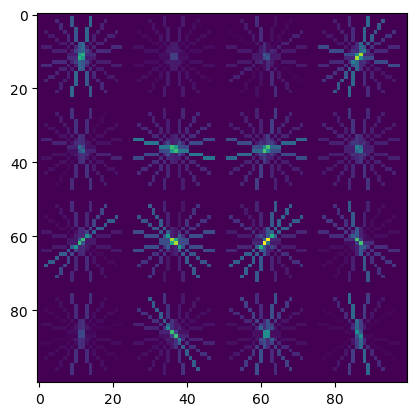

In [ ]:
# 1st image of the training set
plt.imshow(hog_images[0])

##### Case 2:

    pixels_per_cell = 10
    cells_per_block (4X4)
    block_norm = L2-Hys

In [ ]:
# Extracting HOG features
ppc = 10
hog_images = []
hog_features_X_train = []

for image in data_gray_X_train:
    fd,hog_image = hog(image, orientations=8,
                       pixels_per_cell=(ppc,ppc),
                       cells_per_block=(4, 4),
                       block_norm= 'L2-Hys',
                       visualize=True )
    hog_images.append(hog_image)
    hog_features_X_train.append(fd)

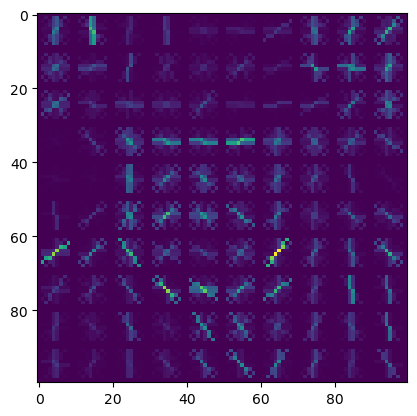

In [ ]:
plt.imshow(hog_images[0])

##### Case 3:

    pixels_per_cell = 6
    cells_per_block (4X4)
    block_norm = L2-Hys

In [ ]:
# Extracting HOG features
ppc = 6
hog_images = []
hog_features_X_train = []

for image in data_gray_X_train:
    fd,hog_image = hog(image, orientations=8,
                       pixels_per_cell=(ppc,ppc),
                       cells_per_block=(4, 4),
                       block_norm= 'L2-Hys',
                       visualize=True )
    hog_images.append(hog_image)
    hog_features_X_train.append(fd)

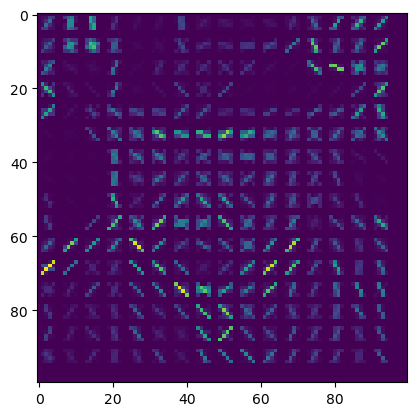

In [ ]:
plt.imshow(hog_images[0])

We can observe that with reducing the pixels_per_cell we are obtaining better HOG features. We would continue with the ppc=6 and train our SVC model on it.

### Training SVC Model

In [ ]:
from sklearn.svm import SVC

# model definition code
clf_svc = SVC(random_state=0)

clf_svc.fit(hog_features_X_train, y_train)

SVC(random_state=0)

#### Applying Feature extraction to Validation Dataset

We would apply same feature extraction method on the validation dataset.

(2595, 21632)

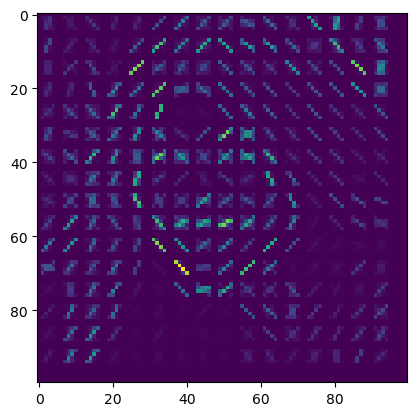

In [ ]:
# Convert to Grayscale
data_gray_X_valid = [ color.rgb2gray(i) for i in X_valid]

# HOG feature extraction
ppc = 6
hog_images = []
hog_features_X_valid = []
for image in data_gray_X_valid:
    fd,hog_image = hog(image, orientations=8,
                       pixels_per_cell=(ppc,ppc),
                       cells_per_block=(4, 4),
                       block_norm= 'L2-Hys',
                       visualize=True)
    hog_images.append(hog_image)
    hog_features_X_valid.append(fd)
plt.imshow(hog_images[0])

# Shape of the validation dataset
hog_features_X_valid = np.array(hog_features_X_valid)
hog_features_X_valid.shape

### Evalution of model on validation set

In [ ]:
# making predictions on validation set
y_pred_test_svc = clf_svc.predict(hog_features_X_valid)

# calculating accuracy score on test set
accuracy_svc = accuracy_score(y_valid, y_pred_test_svc)
print("Acc on validation set: ", accuracy_svc*100)

Acc on validation set:  63.42967244701349


## Predicting on test set

#### Loading dataset

In [ ]:
images_test = np.load(join(dataset_directory, 'test_images.npy'))
images_test = images_test.reshape([-1, image_size, image_size, 3]) / 255.0 

### Preprocessing test dataset



In [ ]:
# Convert to Grayscale
data_gray_public_test = [ color.rgb2gray(i) for i in images_test]

#### HOG Feature extraction

(2374, 21632)

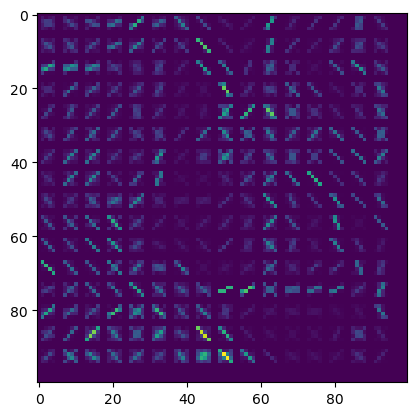

In [ ]:
ppc = 6
hog_images = []
hog_features = []
for image in data_gray_public_test:
    fd,hog_image = hog(image, orientations=8,
                       pixels_per_cell=(ppc,ppc),
                       cells_per_block=(4, 4),
                       block_norm= 'L2-Hys',
                       visualize=True)
    hog_images.append(hog_image)
    hog_features.append(fd)

plt.imshow(hog_images[0])

# shape of the test dataset
hog_features_public_test = np.array(hog_features)
hog_features_public_test.shape

### Predicting

In [ ]:
y_pred = clf_svc.predict(hog_features_public_test)

y_pred

array([1, 2, 2, ..., 0, 2, 1])

### Saving prediction in CSV file

In [ ]:
id = list(range(len(y_pred)))
predicted_data = {"Id": id, "Prediction": y_pred}

savetestfile = join(dataset_directory,'46312625-conv-SVC_HOG_l2hys.csv')

baseline_majority = pd.DataFrame(data=predicted_data)
baseline_majority.to_csv(savetestfile, index=False)

## Details and Notes on the Conventional Learning Model

Before building a final model, I tried with various other Conventional model to get the estimate of which model would be best suited for conventional learning over Image dataset. No preprocessing was done when finallizing the conventional model among others. As getting an approximated accuracy on the raw unfiltered data can be easy and faster was to choose optimal Conventional Model.

After the conventional model was choosen, Preprocessing and feature extraction on the data set was implemented with the help of HOG feature extraction.
* At first Pixel per cell was large ppc=25 to obtain an idea of how the image will be processed and trained by the SVC model.
* Then ppc=10 was assumed and visualized, finally ppc=6 was taken and SVC model with random_state of 0 was trained.
* to train SVC model on HOG feature, we provided 2D array to the model, as the feature extracted from image of 3D i.e. image of size 100 x 100 x 3 (3 channels-RGB) was converted to gray scale then each image feature was saved in an array of features,
* Finally training the model on Validation data to get 63.52% accuracy.

For the test images data, I did the same process of HOG feature extraction to obtain the accuracy of 57%(as in the KAGGLE)

# Deep Learning Model

## PreProcess: Prepare Dateset for training

### Visualising sample images on Training and Validation dataset

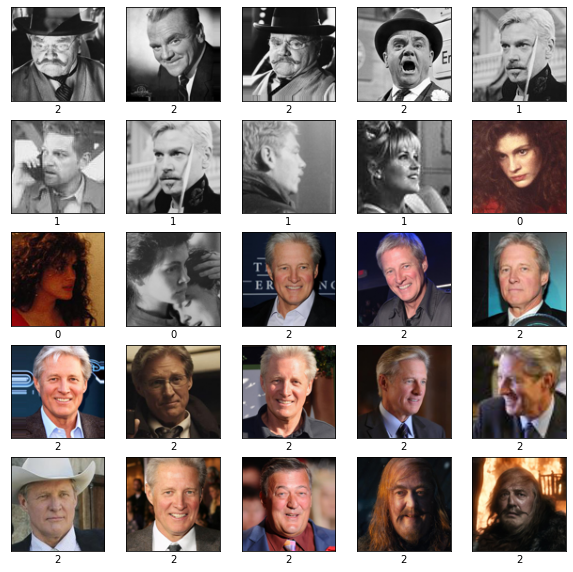

In [ ]:
# Training Dataset

plt.figure(figsize=(10,10))
offset = 0
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i+offset], cmap=plt.cm.binary)
    plt.xlabel(y_train[i+offset])
plt.show()

When viusalizing the training dataset, we can observe that there are some images which are **incorrectly labeled, not a proper face image, 2 faces in a single image**. We can assume that the image data given has a lot of noise, object dectection(face) on the image for learning and training the model on it will not give us a good model.

Thus we would Preprocess the dataset.

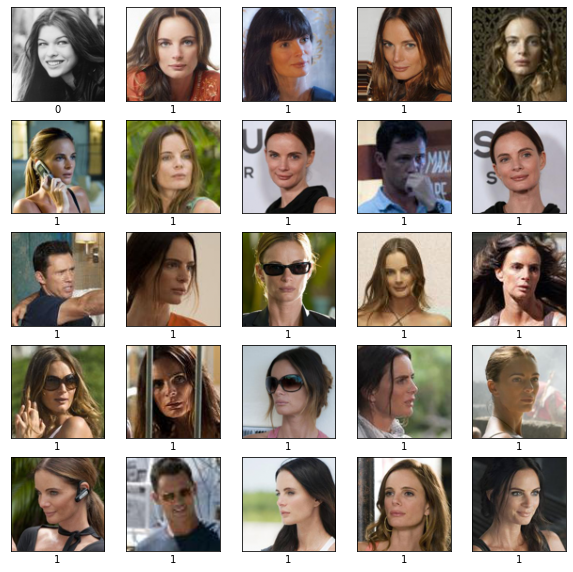

In [ ]:
# Validation dataset

plt.figure(figsize=(10,10))
offset = 0
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_valid[i+offset], cmap=plt.cm.binary)
    plt.xlabel(y_valid[i+offset])
plt.show()

### Configure the dataset for performance

Let's convert our X_train and X_valid numpy array to float32, so that the model training becomes eaiser.

In [6]:
X_train = X_train.astype('float32')
X_valid = X_valid.astype('float32')

print(X_train.shape)
print(X_valid.shape)

(13475, 100, 100, 3)
(2595, 100, 100, 3)


### Checking labels

There are 3 image class 0,1,2 as:
* class 0 represents age group from age 6 to age 20,
* class 1 represents age group from age 35 to age 40 and,
* class 2 represents age group from age 55 to age 98.

When getting the number of images for each class in training dataset, we get Class 0 with 3361 images, class 1 with 6391 images and class 2 with 3723 images. Class 1 has the most number of classification in the training dataset, which will create an imbalance, thus leading model to overfit on class 1

For example, if your batch size is 128, many batches will have class 1 examples, so the gradients will be less informative. Imbalance of labels can be deal with many methods but most famous methods are Downsampling or Upweighting. 

Let's consider that most of the data provided and in real-life example we would get only class 1 images i.e. people in age group between 35 to 40 and try to train our model without applying any Imbalance methods.

In [ ]:
print(y_train[:5])

[2 2 2 2 1]


In [ ]:
# Number of each Label in dataset

unique_classes, count = np.unique(y_train, return_counts=True)

print("Labels Classes:", unique_classes)
print("Number of each label:", count)

Labels Classes: [0 1 2]
Number of each label: [3361 6391 3723]


Text(0, 0.5, 'Number of labels')

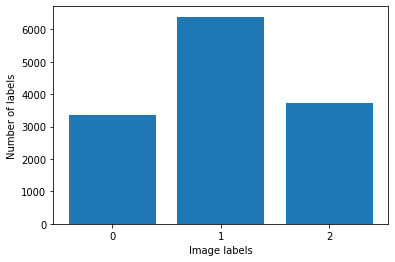

In [ ]:
plt.bar(unique_classes, count)
plt.xticks(unique_classes, ('0', '1', '2'))
plt.xlabel("Image labels")
plt.ylabel("Number of labels")

### Applying class weights

Instead of changing your dataset, another approach to handling imbalanced datasets  is to use class weights from "model.fit". Applying class weights does not work adequately with classic gradient descent and others. However, if we use Adam optimizer, it might give good model.

In [ ]:
class_weights = sklearn.utils.class_weight.compute_class_weight(class_weight = "balanced",
                                                                classes = np.unique(y_train),
                                                                y = y_train)
class_weights = dict(zip(np.unique(y_train), class_weights))
class_weights

{0: 1.3364078151343846, 1: 0.7028112449799196, 2: 1.2064643208881727}

### Random Oversampling Imbalanced Datasets

Random oversampling involves randomly duplicating examples from the minority class and adding them to the training dataset. Examples from the training dataset are selected randomly with replacement. This means that examples from the minority class can be chosen and added to the new “more balanced” training dataset multiple times; they are selected from the original training dataset, added to the new training dataset, and then returned or “replaced” in the original dataset, allowing them to be selected again.

In [ ]:
from imblearn.over_sampling import RandomOverSampler

# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='all')

# apply the transform
tmpShape = X_train.shape[1]*X_train.shape[2]*X_train.shape[3]
X_trainFlat = X_train.reshape(X_train.shape[0], tmpShape)

# Fit the transform data
X_over, y = oversample.fit_resample(X_trainFlat, y_train)

X = X_over.reshape([-1, image_size, image_size, 3])

print(X.shape)
print(X_valid.shape)
print(y.shape)
print(y_valid.shape)

(19173, 100, 100, 3)
(2595, 100, 100, 3)
(19173,)
(2595,)


#### Analysis OverSample data 

In [ ]:
unique_classes, count = np.unique(y_train, return_counts=True )
print("Number of class before oversampling")
print("Class {} with number of count {}".format(unique_classes[0], count[0]) )
print("Class {} with number of count {}".format(unique_classes[1], count[1]) )
print("Class {} with number of count {}".format(unique_classes[2], count[2]) )


print("==================================")
unique_classes, count = np.unique(y, return_counts=True )
print("Number of class after oversampling")
print("Class {} with number of count {}".format(unique_classes[0], count[0]) )
print("Class {} with number of count {}".format(unique_classes[1], count[1]) )
print("Class {} with number of count {}".format(unique_classes[2], count[2]) )

Number of class before oversampling
Class 0 with number of count 3361
Class 1 with number of count 6391
Class 2 with number of count 3723
Number of class after oversampling
Class 0 with number of count 6391
Class 1 with number of count 6391
Class 2 with number of count 6391


Text(0, 0.5, 'Number of labels')

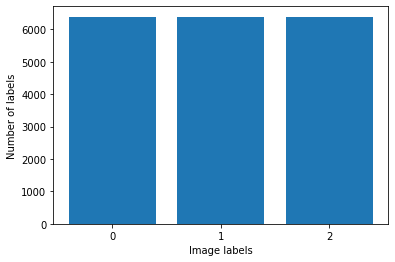

In [ ]:
plt.bar(unique_classes, count)
plt.xticks(unique_classes, ('0', '1', '2'))
plt.xlabel("Image labels")
plt.ylabel("Number of labels")

### Data Augmentation

In this we would increasing the amount of data by generating new data from existing data. This includes adding minor alterations to data or **ImageDataGenerator** to generate new data in the latent space of original data to amplify the dataset. Original images with some sort of minor geometric transformations (such as flipping, translation, rotation, or the addition of noise) in order to increase the diversity of the training set.

Image Augmentation done on image Dataset are:

1. shear_range=0.2,specifies the angle of the slant in degrees.
2. vertical_flip=True, Randomly flip image vertically.
3. horizontal_flip=True, Randomly flip image Horizontally.
4. rotation_range=40, Degree range for random rotations for image.
5. width_shift_range=0.2, It with shift it image in terms of Width.
6. height_shift_range=0.2, It with shift it image in terms of Height.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# define data preparation
datagen_dnn = ImageDataGenerator(
    shear_range=0.2,
    vertical_flip=True,
    horizontal_flip=True,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
)

datagen_dnn.fit(X)

In [ ]:
train_ds = datagen_dnn.flow(X, y, batch_size=32)
valid_ds = datagen_dnn.flow(X_valid, y_valid, batch_size=32)

#### Plotting Augmented Images

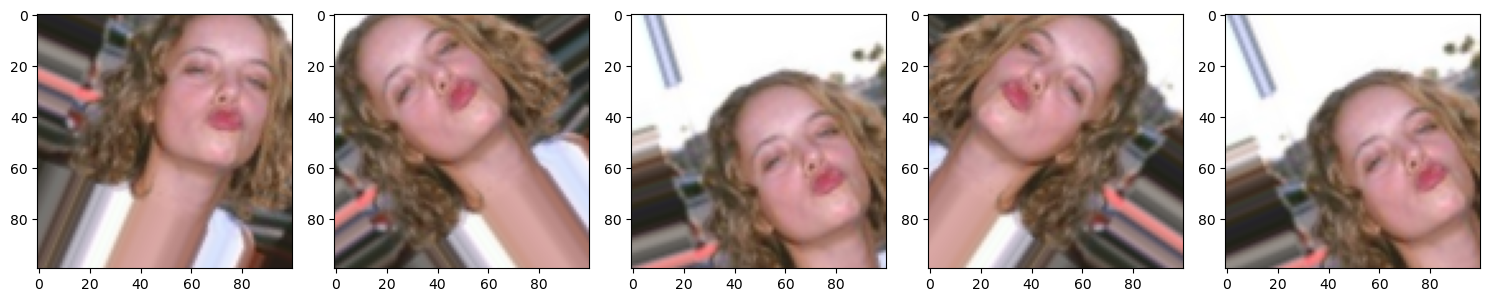

In [ ]:
from matplotlib.pyplot import imread, imshow, subplots, show

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(15,15))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()
    
    
augmented_images = [train_ds[0][0][0] for i in range(5)]
plotImages(augmented_images)

## Clear Backend session 

In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Flatten, Dense

In [8]:
def clear_session():
  tf.keras.backend.clear_session()
  np.random.seed(42)
  tf.random.set_seed(42)

## DNN Model Setup

### Create Model

We would build a DNN model as 
* Input flatter layer: which accepts the input image of size 100,100,3 and flatten it.
* Hidden Dense layer 1: of 300 neurons with Activation fucntion "relu".
* Hidden Dense layer 2: of 200 neurons with Activation fucntion "relu".
* Hidden Dense layer 3: of 100 neurons with Activation fucntion "relu".
* Output Dense layer: of 3 neurons with Activation fucntion "Softmax".

**Activation Functions**

ReLU stands for Rectified Linear Unit. The main advantage of using the ReLU function over other activation functions is that it does not activate all the neurons at the same time. This means that the neurons will only be deactivated if the output of the linear transformation is less than 0. 



In [ ]:
def create_dnn_basemodel(optimizer):

  clear_session()

  basemodel = tf.keras.models.Sequential()
  basemodel.add(Flatten(input_shape=[100, 100, 3]))
  basemodel.add(Dense(300, activation='relu'))
  basemodel.add(Dense(200, activation='relu'))
  basemodel.add(Dense(100, activation='relu'))
  basemodel.add(Dense(3, activation='softmax'))

  basemodel.compile(optimizer=optimizer,
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

  return basemodel


### Setting up Optimizer

* Optimizer:**Adam**: beacuse the optimization algorithm is a further extension of stochastic gradient descent to update network weights during training. Unlike maintaining a single learning rate through training in SGD, Adam optimizer updates the learning rate for each network weight individually. It has faster running time, low memory requirements, and requires less tuning than any other optimization algorithm. Default learning rate for Adam is 0.001.
* Loss: sparse_categorical_crossentropy Since it is a classification problem and we want to predict(Y) as integers [0],[1] and [2].

In [17]:
from keras.optimizers import Adam

optimizer = Adam()

### Earlystopping

Stop training when a monitored metric has stopped improving. Assuming our goal of a training is to **minimize the validation loss**. With this, the metric to be monitored would be 'loss', and mode would be 'min'. A model.fit() training loop will check at end of every epoch whether the loss is no longer decreasing, considering the min_delta and patience if applicable. Once it's found no longer decreasing, model.stop_training is marked True and the training terminates. Parameter in Earlystopping are:
* Patience: Number of epochs with no improvement after which training will be stopped.
* Restore_best_weights: Whether to restore model weights from the epoch with the best value of the monitored quantity.

In [18]:
early_stop=tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                            restore_best_weights= True,
                                            patience=3,
                                            verbose=1)
callback = [early_stop]

## DNNi - Train Model on Class Weigths

In [ ]:
DNNi = create_dnn_basemodel(optimizer)
DNNi.summary()

Metal device set to: Apple M1


2022-10-29 18:58:14.946421: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-10-29 18:58:14.947940: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 30000)             0         
                                                                 
 dense (Dense)               (None, 300)               9000300   
                                                                 
 dense_1 (Dense)             (None, 200)               60200     
                                                                 
 dense_2 (Dense)             (None, 100)               20100     
                                                                 
 dense_3 (Dense)             (None, 3)                 303       
                                                                 
Total params: 9,080,903
Trainable params: 9,080,903
Non-trainable params: 0
_________________________________________________________________


#### Model sumamry

We have build a sequential model, which takes an images of shape 100X100X3(width and height =100, and Channel =3).

* 1st hidden layer has 30000 X 300 connection weights, plus 300 bias terms, which adds up to 9000300 parameters.
* 2nd hidden layer has 300 X 200 connection weights, plus 200 bias terms, which adds uptop 60200 parameters. 
* 3rd hidden layer has 200 X 100 connection weights, plus 100 bias terms, which adds uptop 20100 parameters. And Output layer has 100 X 3 connection weighs, plus 3. 
* We choose 3 because we have 3 label classes to predict.

This gives the model quite a lot of flexibility to fit the training data, but it also means that the model runs the risk of overfitting.

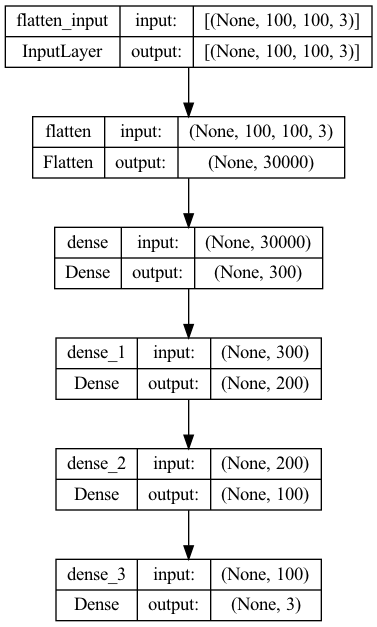

In [ ]:
keras.utils.plot_model(DNNi, show_shapes=True)

### Fit and train model

In [ ]:
DNNi_history = DNNi.fit(X_train, y_train,
                        validation_data=(X_valid, y_valid),
                        epochs=50,
                        class_weight=class_weights,
                        callbacks=callback)

Epoch 1/50


2022-10-29 18:58:26.196487: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-10-29 18:58:26.792979: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


422/422 [==============================] - ETA: 0s - loss: 1.4667 - accuracy: 0.3935

2022-10-29 18:58:36.842015: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


422/422 [==============================] - 11s 25ms/step - loss: 1.4667 - accuracy: 0.3935 - val_loss: 1.0282 - val_accuracy: 0.4871
Epoch 2/50
422/422 [==============================] - 10s 24ms/step - loss: 1.0673 - accuracy: 0.4139 - val_loss: 0.9759 - val_accuracy: 0.5171
Epoch 3/50
422/422 [==============================] - 9s 22ms/step - loss: 1.0419 - accuracy: 0.4346 - val_loss: 1.0493 - val_accuracy: 0.5719
Epoch 4/50
422/422 [==============================] - 9s 22ms/step - loss: 1.0585 - accuracy: 0.4168 - val_loss: 1.1387 - val_accuracy: 0.2339
Epoch 5/50
422/422 [==============================] - 9s 22ms/step - loss: 1.0330 - accuracy: 0.4218 - val_loss: 1.1954 - val_accuracy: 0.3187
Epoch 5: early stopping


### Plotting model Accuracy and loss

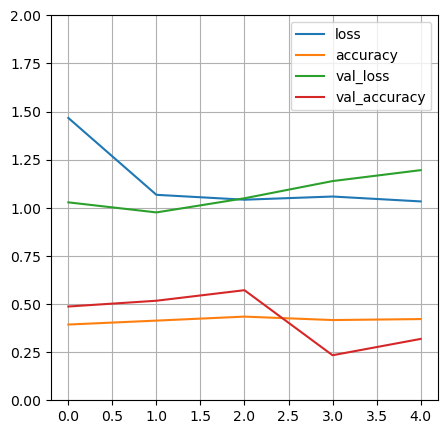

In [ ]:
pd.DataFrame(DNNi_history.history).plot(figsize=(5, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2)
plt.show()

In the plot: 

* Training loss is denoted by blue line.
* Validation loss is denoted by green line.
* Training Accuracy is denoted by orange line.
* Validation Accuracy is denoted by red line.


Loss-Line:
    
  We observe that there is significant drop of loss seen at 1st epoch, which is gerenally good as the weights of the neural network will be adjusted often by minimize the loss function. After the first epoch the training loss decreases but at very slow rate. Whereas for validation loss incereases telling us an overfitting trend.
    
Accuracy-Line:
    
  For training accuracy does not show any pattern could mean that mode is not learning, whereas validation accuracy show a drop and rise. There is a chance if we remove the Earlystopping, we might see a zig-zag pattern but it is not particular that the model will learn at very fast rate.
    

We can also assume the variation of loss as the model maybe too dense for training according to the training and validation data given or it batch size it too small.

## DNNii - Model With oversmapling and Agumented data

In [ ]:
DNNii = create_dnn_basemodel(optimizer)
DNNii.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 30000)             0         
                                                                 
 dense (Dense)               (None, 300)               9000300   
                                                                 
 dense_1 (Dense)             (None, 200)               60200     
                                                                 
 dense_2 (Dense)             (None, 100)               20100     
                                                                 
 dense_3 (Dense)             (None, 3)                 303       
                                                                 
Total params: 9,080,903
Trainable params: 9,080,903
Non-trainable params: 0
_________________________________________________________________


### Fit and Train model

In [ ]:
DNNii_history = DNNii.fit(train_ds,
                          validation_data=valid_ds,
                          epochs=50,
                          callbacks=callback)

Epoch 1/50


2022-10-29 19:00:01.546260: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


600/600 [==============================] - ETA: 0s - loss: 1.8660 - accuracy: 0.3469

2022-10-29 19:00:53.041830: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


600/600 [==============================] - 57s 95ms/step - loss: 1.8660 - accuracy: 0.3469 - val_loss: 1.0756 - val_accuracy: 0.3811
Epoch 2/50
600/600 [==============================] - 39s 64ms/step - loss: 1.1064 - accuracy: 0.3529 - val_loss: 1.1250 - val_accuracy: 0.2220
Epoch 3/50
600/600 [==============================] - 39s 65ms/step - loss: 1.1057 - accuracy: 0.3550 - val_loss: 1.1289 - val_accuracy: 0.2663
Epoch 4/50
600/600 [==============================] - 38s 64ms/step - loss: 1.0996 - accuracy: 0.3648 - val_loss: 1.0901 - val_accuracy: 0.3256
Epoch 4: early stopping


### Plotting model Accuracy and loss

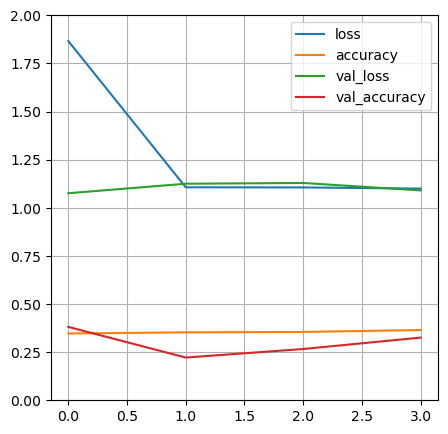

In [ ]:
pd.DataFrame(DNNii_history.history).plot(figsize=(5, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2)
plt.show()

In this plot:
    
  There is not much change is training and accuracy loss, Thus confirming that the model is not learning, model is facing an overfitting issue. Due to the overfitting validation Accuracy has decreased. That means model is learning the detail and noise in the training data to the extent that it negatively impacts the performance of the model on new data source. The model is learning training data by heart and won't learn to generalise. It will thus seem to be very good during training, but will fail miserably on the test set. Whereas Earlystopping prevented the model to do that.

## DNNiii - With Regularization

One way to prevent overfitting is to use regularization. Regularization is a method that controls the model complexity. When there are a lot of features then there will be a large number of weights, which will make the model prone to overfitting. So regularization reduces the burden on these weights. The weights then end up having less impact on the loss function which determines the error between the actual label and predicted label.

L1 tends to shrink coefficients to zero whereas L2 tends to shrink coefficients evenly. L1 is therefore useful for feature selection, as we can drop any variables associated with coefficients that go to zero. L2, on the other hand, is useful when you have collinear/codependent features.

In [ ]:
from tensorflow.keras import regularizers

### Model

In [ ]:
clear_session()

DNNiii = tf.keras.models.Sequential()
DNNiii.add(Flatten(input_shape=[100, 100, 3]))
DNNiii.add(Dense(300, activation='relu', kernel_regularizer=regularizers.l2(0.02)))
DNNiii.add(Dense(200, activation='relu', kernel_regularizer=regularizers.l2(0.02)))
DNNiii.add(Dense(100, activation='relu', kernel_regularizer=regularizers.l2(0.02)))
DNNiii.add(Dense(3, activation='softmax'))

DNNiii.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 30000)             0         
                                                                 
 dense (Dense)               (None, 300)               9000300   
                                                                 
 dense_1 (Dense)             (None, 200)               60200     
                                                                 
 dense_2 (Dense)             (None, 100)               20100     
                                                                 
 dense_3 (Dense)             (None, 3)                 303       
                                                                 
Total params: 9,080,903
Trainable params: 9,080,903
Non-trainable params: 0
_________________________________________________________________


### Optimizer

In [ ]:
DNNiii.compile(optimizer=optimizer,
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

### Train and fit model

In [ ]:
DNNiii_history = DNNiii.fit(train_ds,
                            validation_data=valid_ds,
                            epochs=50,
                            callbacks=callback)

Epoch 1/50


2022-10-29 19:09:36.100181: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


600/600 [==============================] - ETA: 0s - loss: 5.0552 - accuracy: 0.3372

2022-10-29 19:10:15.801129: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


600/600 [==============================] - 44s 74ms/step - loss: 5.0552 - accuracy: 0.3372 - val_loss: 2.2302 - val_accuracy: 0.2039
Epoch 2/50
600/600 [==============================] - 39s 65ms/step - loss: 1.9714 - accuracy: 0.3324 - val_loss: 1.7522 - val_accuracy: 0.3992
Epoch 3/50
600/600 [==============================] - 38s 63ms/step - loss: 1.6147 - accuracy: 0.3391 - val_loss: 1.5244 - val_accuracy: 0.2035
Epoch 4/50
600/600 [==============================] - 43s 72ms/step - loss: 1.4086 - accuracy: 0.3369 - val_loss: 1.3340 - val_accuracy: 0.2983
Epoch 5/50
600/600 [==============================] - 47s 78ms/step - loss: 1.2867 - accuracy: 0.3387 - val_loss: 1.2410 - val_accuracy: 0.2358
Epoch 6/50
600/600 [==============================] - 45s 76ms/step - loss: 1.2103 - accuracy: 0.3308 - val_loss: 1.1823 - val_accuracy: 0.2262
Epoch 7/50
600/600 [==============================] - 43s 72ms/step - loss: 1.1627 - accuracy: 0.3324 - val_loss: 1.1534 - val_accuracy: 0.2262
Epo

### Plotting model loss and accuracy

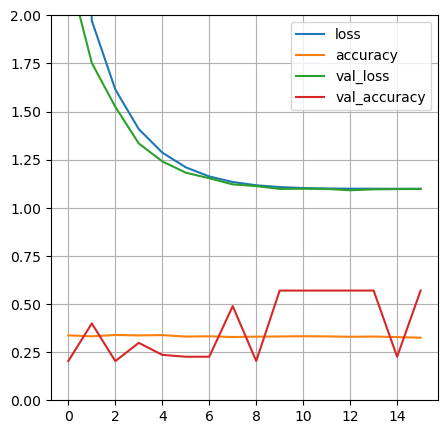

In [ ]:
pd.DataFrame(DNNiii_history.history).plot(figsize=(5, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2)
plt.show()

In this plot:
    
  We can observe the use of regularizers as there is a nice significant training loss and validation loss curve with every epoch. But in case of Training Accuracy, remains almost same. it mean that the model is also not learning. Let reduce the learning rate and train our model.

## DNNiv - Learning Rate

The learning rate hyperparameter controls the rate or speed at which the model learns. Specifically, it controls the amount of apportioned error that the weights of the model are updated with each time they are updated, such as at the end of each batch of training examples.

Generally, a large learning rate allows the model to learn faster, at the cost of arriving on a sub-optimal final set of weights. A smaller learning rate may allow the model to learn a more optimal or even globally optimal set of weights but may take significantly longer to train.

At extremes, a learning rate that is too large will result in weight updates that will be too large and the performance of the model (such as its loss on the training dataset) will oscillate over training epochs. Oscillating performance is said to be caused by weights that diverge (are divergent). A learning rate that is too small may never converge or may get stuck on a suboptimal solution.

Therefore, we should not use a learning rate that is too large or too small. Nevertheless, we must configure the model in such a way that on average a “good enough” set of weights is found to approximate the mapping problem as represented by the training dataset.

### Setting up Optimizer (Smaller learning rate;1e-5)

In [ ]:
optimizer = Adam(learning_rate=1e-5)

### Model

In [ ]:
clear_session()
DNNiv = DNNiii
DNNiv.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 30000)             0         
                                                                 
 dense (Dense)               (None, 300)               9000300   
                                                                 
 dense_1 (Dense)             (None, 200)               60200     
                                                                 
 dense_2 (Dense)             (None, 100)               20100     
                                                                 
 dense_3 (Dense)             (None, 3)                 303       
                                                                 
Total params: 9,080,903
Trainable params: 9,080,903
Non-trainable params: 0
_________________________________________________________________


### Compile model

In [ ]:
DNNiv.compile(optimizer=optimizer,
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

### Training model

In [ ]:
DNNiv_history = DNNiv.fit(train_ds,
                          validation_data=valid_ds,
                          epochs=50,
                          callbacks=callback)

Epoch 1/50


2022-10-29 20:08:12.808903: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


600/600 [==============================] - ETA: 0s - loss: 1.0986 - accuracy: 0.3333

2022-10-29 20:08:59.165230: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


600/600 [==============================] - 53s 87ms/step - loss: 1.0986 - accuracy: 0.3333 - val_loss: 1.0982 - val_accuracy: 0.5699
Epoch 2/50
600/600 [==============================] - 48s 81ms/step - loss: 1.0986 - accuracy: 0.3333 - val_loss: 1.0983 - val_accuracy: 0.5699
Epoch 3/50
600/600 [==============================] - 43s 71ms/step - loss: 1.0986 - accuracy: 0.3333 - val_loss: 1.0982 - val_accuracy: 0.5699
Epoch 4/50
600/600 [==============================] - 44s 73ms/step - loss: 1.0986 - accuracy: 0.3333 - val_loss: 1.0983 - val_accuracy: 0.5699
Epoch 5/50
600/600 [==============================] - 42s 71ms/step - loss: 1.0986 - accuracy: 0.3333 - val_loss: 1.0983 - val_accuracy: 0.5699
Epoch 6/50
600/600 [==============================] - 47s 78ms/step - loss: 1.0986 - accuracy: 0.3295 - val_loss: 1.0983 - val_accuracy: 0.5699
Epoch 6: early stopping


### Plotting Loss and Accuracy

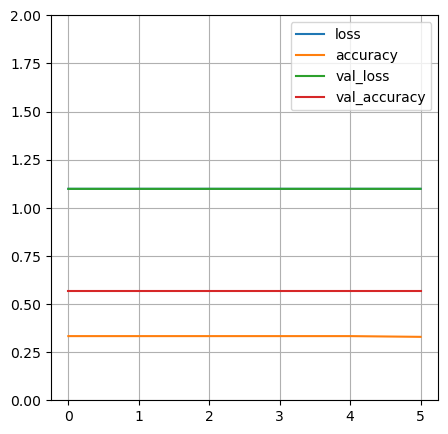

In [ ]:
pd.DataFrame(DNNiv_history.history).plot(figsize=(5, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2)
plt.show()

In this plot:

  When changing the learning rate of the model to smaller, we observe that the model is not learning, Thus Adam learning rate of 1e-5 is way to smaller, we would discarding the model.

## Evaluting DNN models

In [ ]:
dnni_loss, dnni_accuracy = DNNi.evaluate(X_valid, y_valid)

print("Loss: ", dnni_loss)
print("Accuracy: ", dnni_accuracy)

dnnii_loss, dnnii_accuracy = DNNii.evaluate(valid_ds)

print("Loss: ", dnnii_loss)
print("Accuracy: ", dnnii_accuracy)

dnniii_loss, dnniii_accuracy = DNNiii.evaluate(valid_ds)

print("Loss: ", dnniii_loss)
print("Accuracy: ", dnniii_accuracy)

dnniv_loss, dnniv_accuracy = DNNiv.evaluate(valid_ds)

print("Loss: ", dnniv_loss)
print("Accuracy: ", dnniv_accuracy)

2022-10-29 20:12:56.667649: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


82/82 [==============================] - 1s 10ms/step - loss: 0.9759 - accuracy: 0.5171
Loss:  0.9758772253990173
Accuracy:  0.5171483755111694


2022-10-29 20:12:57.851776: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


82/82 [==============================] - 5s 54ms/step - loss: 1.0777 - accuracy: 0.3846
Loss:  1.0776904821395874
Accuracy:  0.38458573818206787
82/82 [==============================] - 4s 54ms/step - loss: 1.0982 - accuracy: 0.5699
Loss:  1.0982272624969482
Accuracy:  0.5699421763420105
82/82 [==============================] - 4s 53ms/step - loss: 1.0982 - accuracy: 0.5699
Loss:  1.0982272624969482
Accuracy:  0.5699421763420105


After Evaluting DNN model on validaton data, we get

Model|Loss|Accuracy
---|---|---|
DNNi|0.97|51%
DNNii|1.07|38%
DNNiii|1.09|56%
DNNiv|1.09|56%

DNNi being the model trained with class weigths gives use the loss of 0.97 with 51% accuracy. DNNii being the model trained with Oversampling and Augmented Data gives use the loss of 1.07 with 56% accuracy. DNNiii being the model trained when L2 regularizer are define in the model gives use the loss of 1.09 with 20% accuracy. DNNiv being the model with lower learning rate gives use the loss of 1.09 with 56% accuracy.

Of all the DNN variants be optimum loss on training and validation data can be seen when we use L2 regularizers with 0.02 rate, but it does not result in good model fit for validation data as the accuracy is just 20%. **We can say DNNiii would be the best model out of all other since the loss curve is tells the model is good.**

## Convolutional Neural Network(CNN)

### Preprocess training labels

In [9]:
import tensorflow as tf

y_train = tf.keras.utils.to_categorical(y_train, num_classes=3)
y_valid = tf.keras.utils.to_categorical(y_valid, num_classes=3)

y_train[:10]

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]], dtype=float32)

### Random OverSampling

In [10]:
from imblearn.over_sampling import RandomOverSampler

# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='all')

# apply the transform
tmpShape = X_train.shape[1]*X_train.shape[2]*X_train.shape[3]
X_trainFlat = X_train.reshape(X_train.shape[0], tmpShape)

# Fit the transform data
X_over, y = oversample.fit_resample(X_trainFlat, y_train)
X = X_over.reshape([-1, image_size, image_size, 3])

print(X.shape)
print(X_valid.shape)
print(y.shape)
print(y_valid.shape)

(19173, 100, 100, 3)
(2595, 100, 100, 3)
(19173, 3)
(2595, 3)


### Data Augmentation

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# define data preparation
cnn_datagen = ImageDataGenerator(
    shear_range=0.2,
    vertical_flip=True,
    horizontal_flip=True,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
)

cnn_datagen.fit(X)

In [12]:
train_ds_cnn = cnn_datagen.flow(X, y)
valid_ds = cnn_datagen.flow(X_valid, y_valid)

#### Visualize Data Augumented

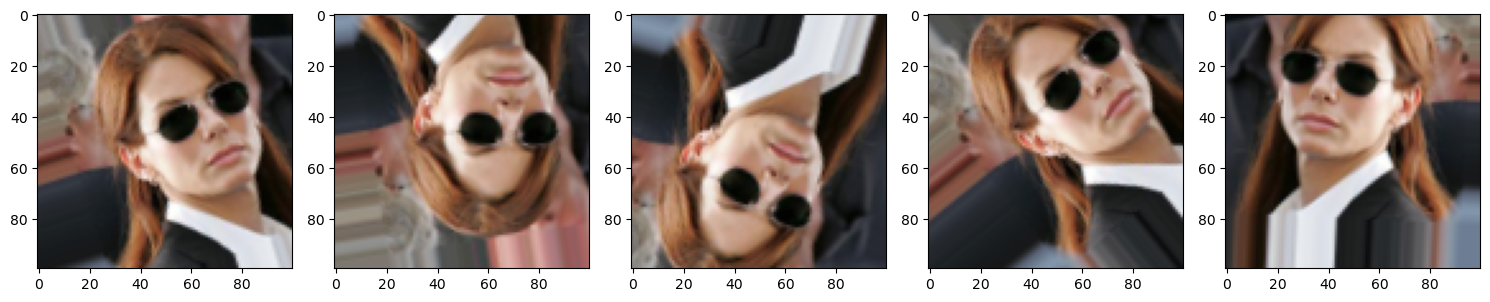

In [13]:
from matplotlib.pyplot import imread, imshow, subplots, show

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(15,15))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()
    
    
augmented_images = [train_ds_cnn[0][0][0] for i in range(5)]
plotImages(augmented_images)

## CNNi Model Setup

### Model

We would build a CNN model as 
* Convolution 2D layer 1: with 32 filters and 3 kernel_size, which accepts the input image of size 100,100,3.
* Convolution 2D layer 2: of 64 filters, 3 kernel_size with Activation fucntion "relu" and L2 regularizers.
* Convolution 2D layer 3: of 128 filters, 3 kernel_size with Activation fucntion "relu" and L2 regularizers.
* Flatten layer
* Hidden Dense layer: of 100 neurons with Activation fucntion "relu" and L2 regularizers.
* Output Dense layer: of 3 neurons with Activation fucntion "Softmax".

**Activation Functions**

ReLU stands for Rectified Linear Unit. The main advantage of using the ReLU function over other activation functions is that it does not activate all the neurons at the same time. This means that the neurons will only be deactivated if the output of the linear transformation is less than 0.

In [ ]:
from tensorflow.keras.layers import Conv2D, Dense, Flatten
from tensorflow.keras import regularizers

def create_cnn_basemodel(optimizer, activation_function):

  clear_session()
  basemodel = tf.keras.models.Sequential()
  basemodel.add(Conv2D(32, 3, activation=activation_function,input_shape=[100,100, 3]))
  basemodel.add(Conv2D(64, 3, activation=activation_function, kernel_regularizer=regularizers.l2(0.02)))
  basemodel.add(Conv2D(128, 3, activation=activation_function, kernel_regularizer=regularizers.l2(0.02)))
  basemodel.add(Flatten())
  basemodel.add(Dense(100, activation=activation_function, kernel_regularizer=regularizers.l2(0.02)))
  basemodel.add(Dense(3, activation='softmax'))
  
  basemodel.compile(loss='categorical_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])
  
  return basemodel


### Setting up Optimzer

In [ ]:
optimizer = Adam()
activation_function = 'relu'
CNNi = create_cnn_basemodel(optimizer, activation_function)
CNNi.summary()

Metal device set to: Apple M1


2022-10-31 19:10:03.823388: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-10-31 19:10:03.824582: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 94, 94, 128)       73856     
                                                                 
 flatten (Flatten)           (None, 1131008)           0         
                                                                 
 dense (Dense)               (None, 100)               113100900 
                                                                 
 dense_1 (Dense)             (None, 3)                 303       
                                                                 
Total params: 113,194,451
Trainable params: 113,194,451


### Model Summary

We know from the DNN model that regularizer gives a good model, so we would considering regularizers and since the size of each image is (100, 100, 3), as per the question. Keras then appends an extra dimension for processing multiple batches, i.e., to train multiple images in every step of a single epoch. Since batch size can vary, its size is represented by None. Hence, the input shape becomes (None, 100, 100, 3).

Convolving a (100, 100) image with a (3, 3) filter, with strides and dilation rate of 1, and 'valid' padding, results in an output of size (100 - 3 + 1, 100 - 3 + 1) = (98, 98). Since we have 32 such filters, the output shape becomes (98, 98, 32). This patter is extended to all Convolving layers in the model untill we reach input shape (94,94,128).

The Flatten layer takes all pixels along all channels and creates a 1D vector (not considering batch size). Therefore, an input of (94, 94, 128) is flattened to (94 * 94 * 128) = 1131008 values.

The final Ouput layer is Dense layer with activation fucntion softmax, which gives 3 output values per sample in the batch.

The number of parameters for a Conv2D layer is given by:

(kernel_height * kernel_width * input_channels * output_channels) + (output_channels if bias is used).
So, for the first Conv2D layer with 3 input channels, 32 output channels and a kernel size of (4, 4), the number of parameters is (4 * 4 * 3 * 32) + 32 = 1568.

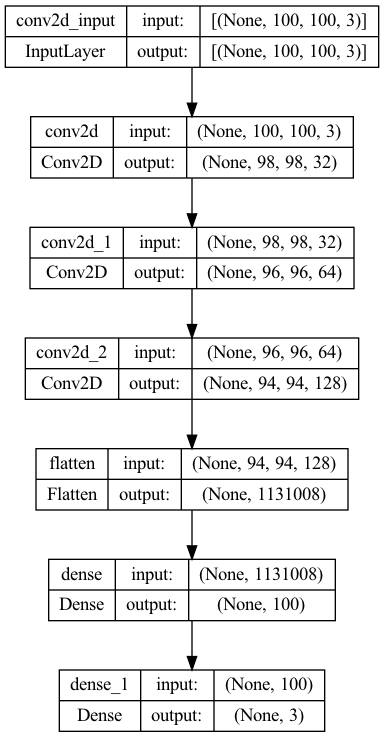

In [ ]:
keras.utils.plot_model(CNNi, show_shapes=True)

### Fit and Train

In [ ]:
CNNi_history = CNNi.fit(train_ds_cnn,
                        epochs=60,
                        validation_data=valid_ds,
                        callbacks=callback)

Epoch 1/60


2022-10-31 19:10:44.815860: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-10-31 19:10:45.529130: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


600/600 [==============================] - ETA: 0s - loss: 2.1704 - accuracy: 0.3262

2022-10-31 19:19:59.512431: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


600/600 [==============================] - 591s 982ms/step - loss: 2.1704 - accuracy: 0.3262 - val_loss: 1.5004 - val_accuracy: 0.5699
Epoch 2/60
600/600 [==============================] - 596s 993ms/step - loss: 1.3761 - accuracy: 0.3340 - val_loss: 1.2855 - val_accuracy: 0.2039
Epoch 3/60
600/600 [==============================] - 592s 985ms/step - loss: 1.2226 - accuracy: 0.3311 - val_loss: 1.1778 - val_accuracy: 0.2039
Epoch 4/60
600/600 [==============================] - 590s 982ms/step - loss: 1.1516 - accuracy: 0.3320 - val_loss: 1.1307 - val_accuracy: 0.2262
Epoch 5/60
600/600 [==============================] - 568s 945ms/step - loss: 1.1202 - accuracy: 0.3341 - val_loss: 1.1093 - val_accuracy: 0.5699
Epoch 6/60
600/600 [==============================] - 576s 960ms/step - loss: 1.1071 - accuracy: 0.3298 - val_loss: 1.1045 - val_accuracy: 0.2262
Epoch 7/60
600/600 [==============================] - 585s 975ms/step - loss: 1.1019 - accuracy: 0.3259 - val_loss: 1.1019 - val_accura

### Plotting Accuracy and loss

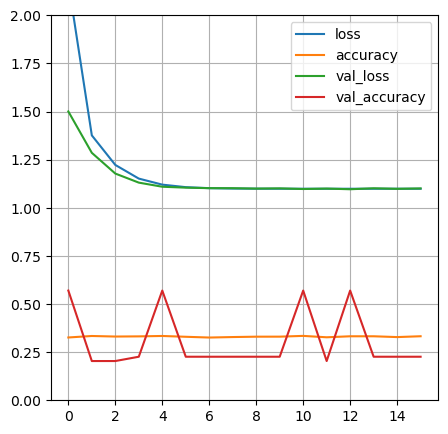

In [ ]:
pd.DataFrame(CNNi_history.history).plot(figsize=(5, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2)
plt.show()

### Model (Activation - Sigmoid)

In [ ]:
activation_function = 'sigmoid'
CNNi_1 = create_cnn_basemodel(optimizer, activation_function)
CNNi_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 94, 94, 128)       73856     
                                                                 
 flatten (Flatten)           (None, 1131008)           0         
                                                                 
 dense (Dense)               (None, 100)               113100900 
                                                                 
 dense_1 (Dense)             (None, 3)                 303       
                                                                 
Total params: 113,194,451
Trainable params: 113,194,451


In [ ]:
CNNi_1_history = CNNi_1.fit(train_ds_cnn,
                        epochs=60,
                        validation_data=valid_ds,
                        callbacks=callback)

Epoch 1/60


2022-10-31 08:16:52.660109: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-10-31 08:16:53.473279: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


600/600 [==============================] - ETA: 0s - loss: 3.1169 - accuracy: 0.3373

2022-10-31 08:25:39.312998: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


600/600 [==============================] - 563s 935ms/step - loss: 3.1169 - accuracy: 0.3373 - val_loss: 2.3791 - val_accuracy: 0.2262
Epoch 2/60
600/600 [==============================] - 586s 976ms/step - loss: 2.8396 - accuracy: 0.3318 - val_loss: 3.1512 - val_accuracy: 0.5699
Epoch 3/60
600/600 [==============================] - 560s 933ms/step - loss: 2.6822 - accuracy: 0.3385 - val_loss: 2.3545 - val_accuracy: 0.2039
Epoch 4/60
600/600 [==============================] - 582s 969ms/step - loss: 2.5219 - accuracy: 0.3361 - val_loss: 2.6496 - val_accuracy: 0.2262
Epoch 5/60
600/600 [==============================] - 570s 951ms/step - loss: 2.1830 - accuracy: 0.3316 - val_loss: 2.0309 - val_accuracy: 0.5699
Epoch 6/60
600/600 [==============================] - 603s 1s/step - loss: 2.1641 - accuracy: 0.3329 - val_loss: 1.5374 - val_accuracy: 0.2262
Epoch 7/60
600/600 [==============================] - 612s 1s/step - loss: 1.9192 - accuracy: 0.3324 - val_loss: 1.5252 - val_accuracy: 0.

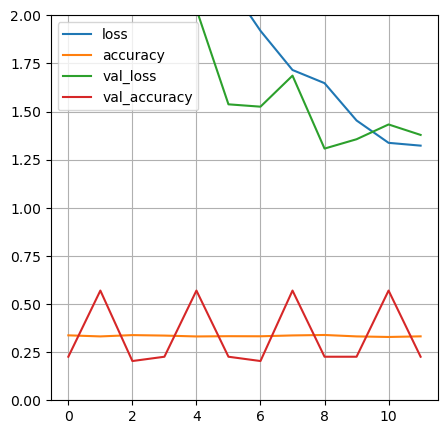

In [ ]:
pd.DataFrame(CNNi_1_history.history).plot(figsize=(5, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2)
plt.show()

In the plot:

Changing the activation function to sigmoid, it has not changed the learning of the model. As from before we can see that the training accuracy of the model is not being changed meaning model is not learning. Also the Loss rate for training and validation set is not in proper response. Let's try to training the model with adding more layers and changing the activation function to Leakyrelu.

## CNNii - Dropout Layers

The Dropout layer randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting. Inputs not set to 0 are scaled up by 1/(1 - rate) such that the sum over all inputs is unchanged.

Dropout layer only applies during the training time of the dataset, not during the validation. Since we do not have huge amount of data we would use dropout rate as 0.2 i.e. 20% of the features should be drouped out.

### Model

In [ ]:
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Dropout

clear_session()
CNNii = tf.keras.models.Sequential()
CNNii.add(Conv2D(32, 3, activation='relu',input_shape=[100,100, 3]))
CNNii.add(Conv2D(64, 3, activation='relu', kernel_regularizer=regularizers.l2(0.02)))
CNNii.add(Conv2D(128, 3, activation='relu', kernel_regularizer=regularizers.l2(0.02)))
CNNii.add(Dropout(0.2))
CNNii.add(Flatten())
CNNii.add(Dense(100, activation="relu", kernel_regularizer=regularizers.l2(0.02)))
CNNii.add(Dense(3, activation='softmax'))

CNNii.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 94, 94, 128)       73856     
                                                                 
 dropout (Dropout)           (None, 94, 94, 128)       0         
                                                                 
 flatten (Flatten)           (None, 1131008)           0         
                                                                 
 dense (Dense)               (None, 100)               113100900 
                                                                 
 dense_1 (Dense)             (None, 3)                 3

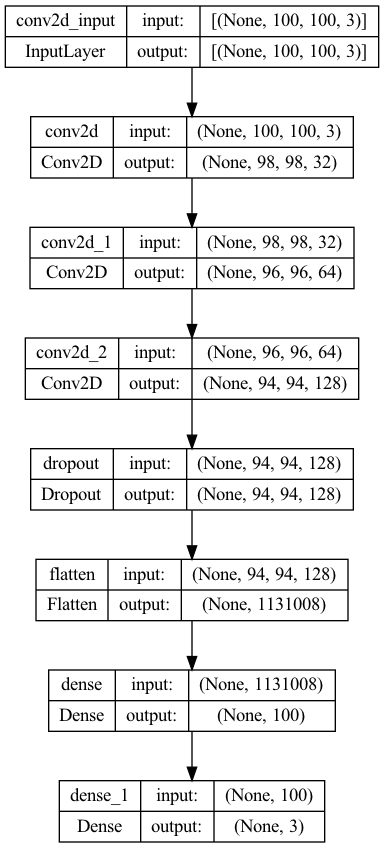

In [ ]:
keras.utils.plot_model(CNNii, show_shapes=True)

### Complie Model

In [ ]:
from keras.optimizers import Adam

optimizer = Adam(learning_rate=0.01)

CNNii.compile(loss='categorical_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])

### Fit model

In [ ]:
CNNii_history = CNNii.fit(train_ds_cnn,
                        epochs=60,
                        validation_data=valid_ds,
                        callbacks=callback)

Epoch 1/60


2022-10-30 09:49:34.711266: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-10-30 09:49:35.343646: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


600/600 [==============================] - ETA: 0s - loss: 7.1124 - accuracy: 0.3373

2022-10-30 09:59:59.950610: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


600/600 [==============================] - 661s 1s/step - loss: 7.1124 - accuracy: 0.3373 - val_loss: 1.5267 - val_accuracy: 0.2039
Epoch 2/60
600/600 [==============================] - 656s 1s/step - loss: 1.3532 - accuracy: 0.3356 - val_loss: 1.2434 - val_accuracy: 0.2262
Epoch 3/60
600/600 [==============================] - 635s 1s/step - loss: 1.2223 - accuracy: 0.3315 - val_loss: 1.2628 - val_accuracy: 0.5699
Epoch 4/60
600/600 [==============================] - 614s 1s/step - loss: 1.1703 - accuracy: 0.3282 - val_loss: 1.1413 - val_accuracy: 0.2039
Epoch 5/60
600/600 [==============================] - 619s 1s/step - loss: 1.1621 - accuracy: 0.3294 - val_loss: 1.1216 - val_accuracy: 0.5699
Epoch 6/60
600/600 [==============================] - 615s 1s/step - loss: 1.1429 - accuracy: 0.3394 - val_loss: 1.1688 - val_accuracy: 0.5699
Epoch 7/60
600/600 [==============================] - 619s 1s/step - loss: 1.1436 - accuracy: 0.3316 - val_loss: 1.1591 - val_accuracy: 0.5699
Epoch 8/60

### Plot loss and Accuracy

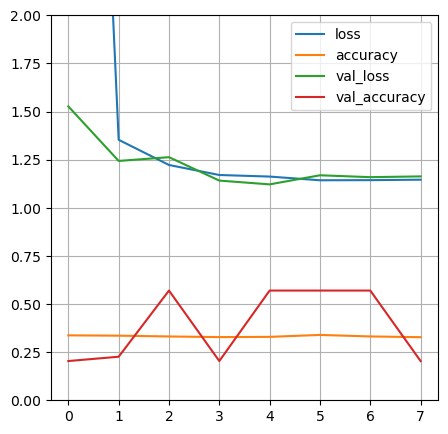

In [ ]:
pd.DataFrame(CNNii_history.history).plot(figsize=(5, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2)
plt.show()

In this plot:

We are observing that the loss rate of training and validation set is not going down in a smooth manner but slightly going up and down and finally loss for validation set is greater than training set loss, which shows that the model is not learing proper features.

Although it has same behavior as we observed in CNNi model. So adding Dropout layer might not increase the model accuracy. We can also say that model is not too deep to learn and dropout layer might be droping important feature thus the training accuracy is reamins same.

### Model - LeakyRelu

In [19]:
from tensorflow.keras.layers import Conv2D, Dense, Flatten
from keras.layers import LeakyReLU
from tensorflow.keras import regularizers

clear_session()
CNN_lr = tf.keras.models.Sequential()
CNN_lr.add(Conv2D(32, 3, input_shape=[100,100, 3]))
CNN_lr.add(LeakyReLU(alpha=0.05))
CNN_lr.add(Conv2D(64, 3, kernel_regularizer=regularizers.l2(0.02)))
CNN_lr.add(LeakyReLU(alpha=0.05))
CNN_lr.add(Conv2D(128, 3, kernel_regularizer=regularizers.l2(0.02)))
CNN_lr.add(LeakyReLU(alpha=0.05))
CNN_lr.add(Flatten())
CNN_lr.add(Dense(100, kernel_regularizer=regularizers.l2(0.02)))
CNN_lr.add(LeakyReLU(alpha=0.05))
CNN_lr.add(Dense(3, activation='softmax'))

CNN_lr.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 98, 98, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 96, 96, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 94, 94, 128)       73856     
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 94, 94, 128)       0         
                                                                 
 flatten (Flatten)           (None, 1131008)           0

In [20]:
CNN_lr.compile(loss='categorical_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])

CNN_lr_history = CNN_lr.fit(train_ds_cnn,
                        epochs=60,
                        validation_data=valid_ds,
                        callbacks=callback)

Epoch 1/60


2022-11-03 13:45:08.533781: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-11-03 13:45:09.267275: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


600/600 [==============================] - ETA: 0s - loss: 1.8577 - accuracy: 0.3314

2022-11-03 13:53:52.662186: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


600/600 [==============================] - 560s 930ms/step - loss: 1.8577 - accuracy: 0.3314 - val_loss: 1.2781 - val_accuracy: 0.2039
Epoch 2/60
600/600 [==============================] - 669s 1s/step - loss: 1.1937 - accuracy: 0.3284 - val_loss: 1.1389 - val_accuracy: 0.5699
Epoch 3/60
600/600 [==============================] - 578s 963ms/step - loss: 1.1233 - accuracy: 0.3287 - val_loss: 1.1078 - val_accuracy: 0.5699
Epoch 4/60
600/600 [==============================] - 725s 1s/step - loss: 1.1064 - accuracy: 0.3315 - val_loss: 1.1031 - val_accuracy: 0.2262
Epoch 5/60
600/600 [==============================] - 1355s 2s/step - loss: 1.1016 - accuracy: 0.3275 - val_loss: 1.1006 - val_accuracy: 0.2262
Epoch 6/60
600/600 [==============================] - 580s 966ms/step - loss: 1.1030 - accuracy: 0.3323 - val_loss: 1.0935 - val_accuracy: 0.5699
Epoch 7/60
600/600 [==============================] - 579s 965ms/step - loss: 1.1299 - accuracy: 0.3322 - val_loss: 1.1097 - val_accuracy: 0.56

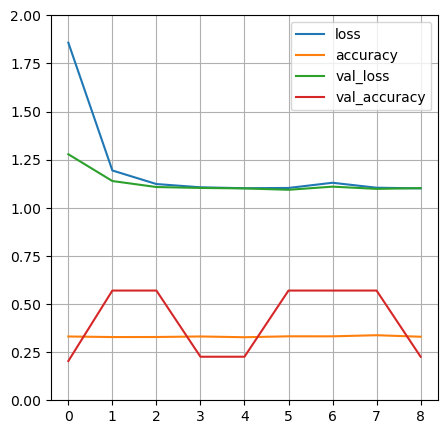

In [21]:
pd.DataFrame(CNN_lr_history.history).plot(figsize=(5, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2)
plt.show()

## CNNiii - Pooling players

The pooling operation involves sliding a two-dimensional filter over each channel of feature map and summarising the features lying within the region covered by the filter. It reduces the dimensions of the feature maps. Thus, it reduces the number of parameters to learn and the amount of computation performed in the network.

The pooling layer summarises the features present in a region of the feature map generated by a convolution layer.

#### Model - Global Average pooling

Global pooling reduces each channel in the feature map to a single value. The default MaxPooling kernel has a shape of (2, 2) and strides of (2, 2). Applying that to a (100, 100) image results in an image of shape (((100 - 2)//2) + 1, ((100 - 2)//2) + 1)) = (50, 50).

In [ ]:
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalAvgPool2D

clear_session()
CNNiii = tf.keras.models.Sequential()
CNNiii.add(Conv2D(32, 3, activation='relu',input_shape=[100,100, 3]))
CNNiii.add(Conv2D(64, 3, activation='relu', kernel_regularizer=regularizers.l2(0.02)))
CNNiii.add(Conv2D(128, 3, activation='relu', kernel_regularizer=regularizers.l2(0.02)))
CNNiii.add(GlobalAvgPool2D())
CNNiii.add(Dropout(0.2))
CNNiii.add(Flatten())
CNNiii.add(Dense(100, activation="relu", kernel_regularizer=regularizers.l2(0.02)))
CNNiii.add(Dense(3, activation='softmax'))

CNNiii.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 94, 94, 128)       73856     
                                                                 
 global_average_pooling2d (G  (None, 128)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 flatten (Flatten)           (None, 128)               0         
                                                        

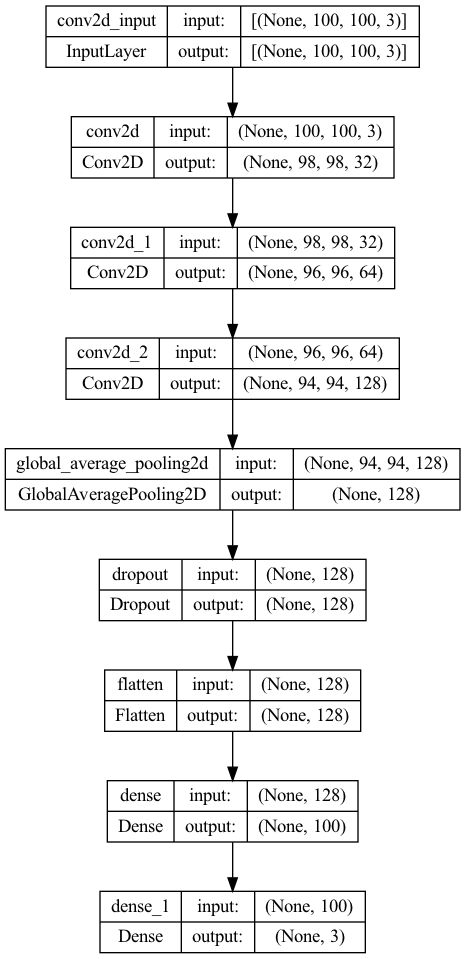

In [ ]:
keras.utils.plot_model(CNNiii, show_shapes=True)

#### Fit and train model

In [ ]:
CNNiii.compile(loss='categorical_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])

CNNiii_history = CNNiii.fit(train_ds_cnn,
                        epochs=60,
                        validation_data=valid_ds,
                        callbacks=callback)

Epoch 1/60


2022-10-30 11:18:13.674768: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


600/600 [==============================] - ETA: 0s - loss: 1.2737 - accuracy: 0.3351

2022-10-30 11:20:50.927561: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


600/600 [==============================] - 165s 274ms/step - loss: 1.2737 - accuracy: 0.3351 - val_loss: 1.1248 - val_accuracy: 0.2262
Epoch 2/60
600/600 [==============================] - 163s 271ms/step - loss: 1.0995 - accuracy: 0.3359 - val_loss: 1.0922 - val_accuracy: 0.5699
Epoch 3/60
600/600 [==============================] - 160s 266ms/step - loss: 1.0994 - accuracy: 0.3280 - val_loss: 1.1026 - val_accuracy: 0.2262
Epoch 4/60
600/600 [==============================] - 150s 249ms/step - loss: 1.0993 - accuracy: 0.3317 - val_loss: 1.0942 - val_accuracy: 0.2039
Epoch 5/60
600/600 [==============================] - 155s 258ms/step - loss: 1.0992 - accuracy: 0.3353 - val_loss: 1.1109 - val_accuracy: 0.2262
Epoch 5: early stopping


#### Plotting loss and Accuracy

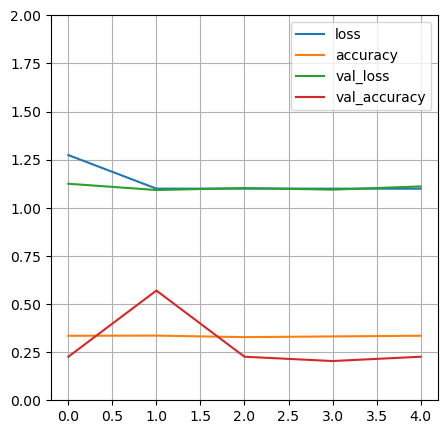

In [ ]:
pd.DataFrame(CNNiii_history.history).plot(figsize=(5, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2)
plt.show()

In this Plot:

  Loss learning curve for training and validation is same, which tells us that the model is not learning.

## CNNiv - Normalization layers

This layer allows every layer of the network to do learning more independently. It is used to normalize the output of the previous layers. The activations scale the input layer in normalization. Using batch normalization learning becomes efficient also it can be used as regularization to avoid overfitting of the model.

The layer is added to the sequential model to standardize the input or the outputs. It can be used at several points in between the layers of the model. It is often placed just after defining the sequential model and after the convolution and pooling layers. 

### Model - BatchNomralization

In [ ]:
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalAveragePooling2D, BatchNormalization

clear_session()
CNNiv = tf.keras.models.Sequential()
CNNiv.add(Conv2D(32, 3, activation='relu',input_shape=[100,100, 3]))
CNNiv.add(BatchNormalization())
CNNiv.add(Conv2D(64, 3, activation='relu', kernel_regularizer=regularizers.l2(0.02)))
CNNiv.add(Conv2D(128, 3, activation='relu', kernel_regularizer=regularizers.l2(0.02)))
CNNiv.add(GlobalAveragePooling2D())
CNNiv.add(BatchNormalization())
CNNiv.add(Dropout(0.2))
CNNiv.add(Flatten())
CNNiv.add(Dense(100, activation="relu", kernel_regularizer=regularizers.l2(0.02)))
CNNiv.add(Dense(3, activation='softmax'))

CNNiv.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 98, 98, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 94, 94, 128)       73856     
                                                                 
 global_average_pooling2d (G  (None, 128)              0         
 lobalAveragePooling2D)                                          
                                                                 
 batch_normalization_1 (Batc  (None, 128)              5

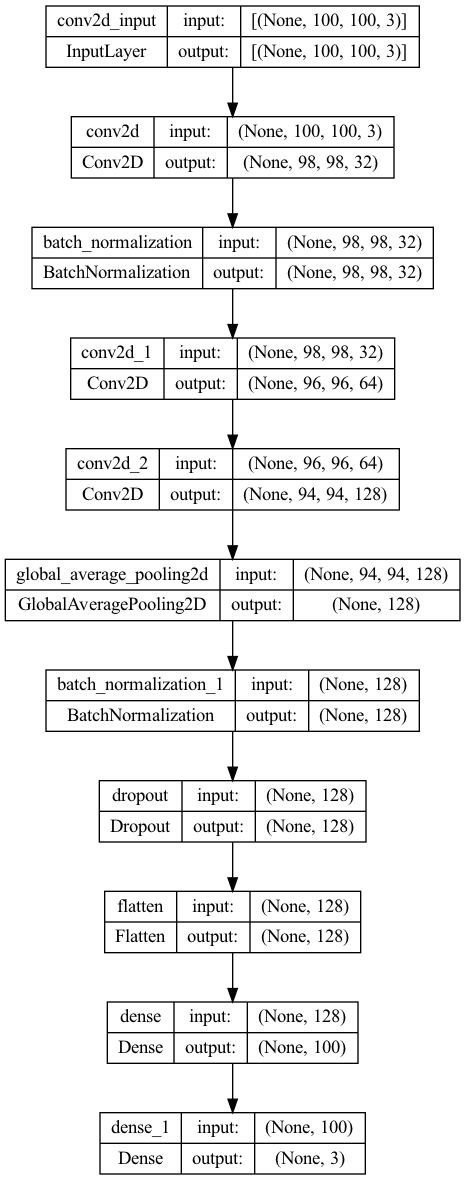

In [ ]:
keras.utils.plot_model(CNNiv, show_shapes=True)

### Fit and train model

In [ ]:
CNNiv.compile(loss='categorical_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])

CNNiv_history = CNNiv.fit(train_ds_cnn,
                        epochs=60,
                        validation_data=valid_ds,
                        callbacks=callback)

Epoch 1/60


2022-10-30 11:32:59.604195: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


600/600 [==============================] - ETA: 0s - loss: 1.7258 - accuracy: 0.3343

2022-10-30 11:35:38.636191: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


600/600 [==============================] - 169s 280ms/step - loss: 1.7258 - accuracy: 0.3343 - val_loss: 1.0955 - val_accuracy: 0.2262
Epoch 2/60
600/600 [==============================] - 162s 271ms/step - loss: 1.0994 - accuracy: 0.3295 - val_loss: 1.1171 - val_accuracy: 0.2262
Epoch 3/60
600/600 [==============================] - 180s 300ms/step - loss: 1.0995 - accuracy: 0.3348 - val_loss: 1.1008 - val_accuracy: 0.2039
Epoch 4/60
600/600 [==============================] - 161s 268ms/step - loss: 1.0993 - accuracy: 0.3352 - val_loss: 1.1058 - val_accuracy: 0.2262
Epoch 4: early stopping


### Plot loss and Accuracy

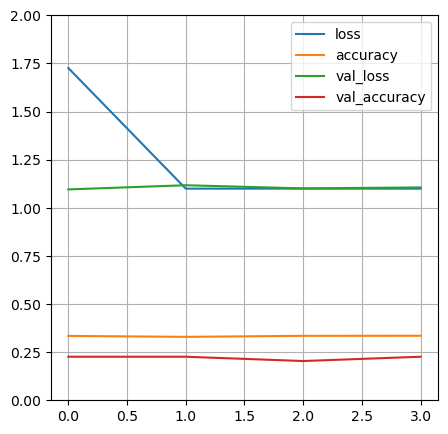

In [ ]:
pd.DataFrame(CNNiv_history.history).plot(figsize=(5, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2)
plt.show()

## Evalute CNN Models


In [ ]:
cnni_loss, cnni_accuracy = CNNi.evaluate(valid_ds)

print("Loss: ", cnni_loss)
print("Accuracy: ", cnni_accuracy)

cnnii_loss, cnnii_accuracy = CNNii.evaluate(valid_ds)

print("Loss: ", cnnii_loss)
print("Accuracy: ", cnnii_accuracy)

cnniii_loss, cnniii_accuracy = CNNiii.evaluate(valid_ds)

print("Loss: ", cnniii_loss)
print("Accuracy: ", cnniii_accuracy)

cnniv_loss, cnniv_accuracy = CNNiv.evaluate(valid_ds)

print("Loss: ", cnniv_loss)
print("Accuracy: ", cnniv_accuracy)

82/82 [==============================] - 37s 446ms/step - loss: 1.0989 - accuracy: 0.5699
Loss:  1.098921537399292
Accuracy:  0.5699421763420105


2022-10-30 13:34:21.652337: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


82/82 [==============================] - 38s 444ms/step - loss: 1.1216 - accuracy: 0.5699
Loss:  1.1216063499450684
Accuracy:  0.5699421763420105
 1/82 [..............................] - ETA: 17s - loss: 1.0938 - accuracy: 0.5000

2022-10-30 13:34:59.901305: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


82/82 [==============================] - 11s 137ms/step - loss: 1.0922 - accuracy: 0.5699
Loss:  1.0922218561172485
Accuracy:  0.5699421763420105


2022-10-30 13:35:11.349233: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


82/82 [==============================] - 10s 116ms/step - loss: 1.0955 - accuracy: 0.2262
Loss:  1.095497727394104
Accuracy:  0.22620424628257751


When evaluting CNN models on Validation data

Model|Loss|Accuracy
---|---|---|
CNNi|1.09|56%
CNNii|1.12|56%
CNNiii|1.09|56%
CNNiv|1.09|22%


CNNi being the basic model CNN structure with 56% accuracy. CNNii when we add Dropout layers with 20% features dropout. CNNiii in addition to dropout layer we add pooling layers before the dropout layer. And CNNiv we try to normalize using BatchNormalization layer after the pooling and before dropout layers.

We can observe that all the CNN models approximatly gives same accuracy of 56% when evaluated on the validation data, which is not a good model. After plotting Loss and Accuracy for each CNN variant we can observe that model with dropout layer has a decent loss curve on training and validation data. Whereas CNN model with pooling and Nomralization does not provide a good Model fit

## Pretrained models

Use of Transfer-learning. It means taking features learned on one problem, and leveraging them on a new, similar problem. For instance, features from a model that has learned to identify racoons may be useful to kick-start a model meant to identify tanukis. The most common incarnation of transfer learning in the context of deep learning is the following workflow:

* Take layers from a previously trained model.
* Freeze them, so as to avoid destroying any of the information they contain during future training rounds.
* Add some new, trainable layers on top of the frozen layers. They will learn to turn the old features into predictions on a new dataset.
* Train the new layers on your dataset.

**Bottleneck features of a pre-trained network**

A more refined approach would be to leverage a network pre-trained on a large dataset. Such a network would have already learned features that are useful for most computer vision problems, and leveraging such features would allow us to reach a better accuracy than any method that would only rely on the available data.

We will use the various architecture such as 
* Inception-ResNet-v2
* VGG19
* EfficientNet

which are pre-trained on the ImageNet dataset --a model previously featured on this blog. Because the ImageNet dataset contains several "cat" classes (persian cat, siamese cat...) and many "dog" classes among its total of 1000 classes, this model will already have learned features that are relevant to our classification problem. In fact, it is possible that merely recording the softmax predictions of the model over our data rather than the bottleneck features would be enough to solve our dogs vs. cats classification problem extremely well. However, the method we present here is more likely to generalize well to a broader range of problems, including problems featuring classes absent from ImageNet.

### PMi - Inception-ResNet-v2 

In [ ]:
import tensorflow as tf
from keras.models import Model
from keras.layers import Dense, Dropout
from keras.applications import InceptionResNetV2

#### Model Explaination

**ResNet**: The architecture of ResNet has 4 stages our image input size is 100 x 100 x 3, it 1st performs the initial convolution and max-pooling using 7×7 and 3×3 kernel sizes respectively. Afterward, Stage 1 of the network starts and it has 3 Residual blocks containing 3 layers each. The size of kernels used to perform the convolution operation in all 3 layers of the block of stage 1 are 64, 64 and 128 respectively.

For each residual function F, 3 layers are stacked one over the other. The three layers are 1×1, 3×3, 1×1 convolutions. The 1×1 convolution layers are responsible for reducing and then restoring the dimensions. The 3×3 layer is left as a bottleneck with smaller input/output dimensions.
Finally, the network has an Average Pooling layer followed by a fully connected layer having 1000 neurons (ImageNet class output).

**Inception**: Salient parts in the image can have extremely large variation in size. Human faces can have many variations, because of this huge variation in the location of the information, choosing the right kernel size for the convolution operation becomes tough. A larger kernel is preferred for information that is distributed more globally, and a smaller kernel is preferred for information that is distributed more locally. Very deep networks are prone to overfitting. It also hard to pass gradient updates through the entire network "As we are facing in the current CNN models"

Thus we combine both model to get a optimal model having pro's of both the model.


#### Implementation

##### Build Model

In [ ]:
def create_base_model(train=None):
    base_model = InceptionResNetV2(
        include_top=False,
        weights='imagenet', 
        input_shape=(100,100,3))
    
    if train==None:
        base_model.trainable = False
    else:
        base_model.trainable = True
        for layer in base_model.layers[:train]:
            layer.trainable = False

    return base_model

##### Visualize trainable layer

In [ ]:
clear_session()
resnet_model = create_base_model()

# Check the trainable status of the individual layers
for layer in resnet_model.layers:
    print(layer, layer.trainable)

780
<keras.engine.input_layer.InputLayer object at 0x16ad2d940> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x17f7e86d0> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x17f7e8550> False
<keras.layers.core.activation.Activation object at 0x17f7e2af0> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x17f7ad370> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x17cba4e80> False
<keras.layers.core.activation.Activation object at 0x17f7ad430> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x417796280> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x40fd3fc40> False
<keras.layers.core.activation.Activation object at 0x40fd3f250> False
<keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x414c210a0> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x414c21280> False
<keras.layers.normalization.batch_normalization.BatchNormalization obj

In [ ]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(resnet_model.layers))

# Trainable variables
len(resnet_model.trainable_variables)

Number of layers in the base model:  780


0

##### PMi Model

In [ ]:
flatten_layer = Flatten()
dropout_layer_1 = Dropout(0.5)
dense_layer = Dense(512, activation='relu')
dropout_layer_2 = Dropout(0.2)
prediction_layer = Dense(3, activation='softmax')


pmi = tf.keras.models.Sequential([
    resnet_model,
    dropout_layer_1,
    flatten_layer,
    dense_layer,
    dropout_layer_2,
    prediction_layer
])
pmi.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1, 1, 1536)       54336736  
 onal)                                                           
                                                                 
 dropout (Dropout)           (None, 1, 1, 1536)        0         
                                                                 
 flatten (Flatten)           (None, 1536)              0         
                                                                 
 dense (Dense)               (None, 512)               786944    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 3)                 1539      
                                                        

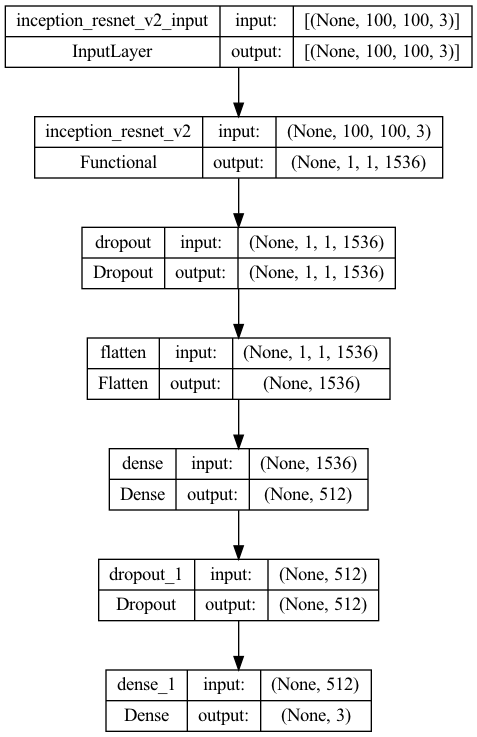

In [ ]:
keras.utils.plot_model(pmi, show_shapes=True)

##### Complie and train model

In [ ]:
optimzer = Adam()

pmi.compile(
    optimizer=optimzer,
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

pmi_history = pmi.fit(
    train_ds_cnn,
    epochs=60,
    validation_data=valid_ds,
    callbacks=callback)


Epoch 1/60


2022-10-30 13:40:54.238006: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


600/600 [==============================] - ETA: 0s - loss: 1.1602 - accuracy: 0.4217

2022-10-30 13:43:28.144115: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


600/600 [==============================] - 185s 295ms/step - loss: 1.1602 - accuracy: 0.4217 - val_loss: 1.0585 - val_accuracy: 0.3684
Epoch 2/60
600/600 [==============================] - 163s 271ms/step - loss: 1.0467 - accuracy: 0.4427 - val_loss: 1.0669 - val_accuracy: 0.3472
Epoch 3/60
600/600 [==============================] - 165s 274ms/step - loss: 1.0350 - accuracy: 0.4618 - val_loss: 1.0421 - val_accuracy: 0.3541
Epoch 4/60
600/600 [==============================] - 166s 276ms/step - loss: 1.0318 - accuracy: 0.4634 - val_loss: 1.0535 - val_accuracy: 0.3541
Epoch 5/60
600/600 [==============================] - 165s 275ms/step - loss: 1.0216 - accuracy: 0.4705 - val_loss: 1.0172 - val_accuracy: 0.4227
Epoch 6/60
600/600 [==============================] - 164s 274ms/step - loss: 1.0189 - accuracy: 0.4721 - val_loss: 1.0419 - val_accuracy: 0.3491
Epoch 7/60
600/600 [==============================] - 165s 276ms/step - loss: 1.0179 - accuracy: 0.4716 - val_loss: 1.0190 - val_accura

##### Plotting Accuracy and loss

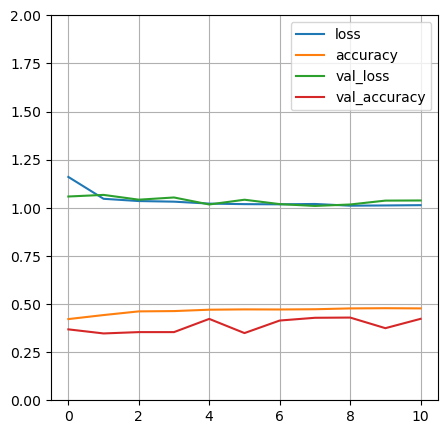

In [ ]:
pd.DataFrame(pmi_history.history).plot(figsize=(5, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2)
plt.show()

In this plot:

Loss rate for training and validation set is almost same for each epoch, which signifies that the model is not learning any new features. Whereas we can confirm that by looking at the accuracy for training and validation set, as training accuracy remains constant.

There might be the reason that the top layer created by frezeeing whole ResNet layer is not in a proper architecture with the model, thus the weight of the the model is not compatible with custom layer, which looses it's learning ability for the image.

### VGG19

In [ ]:
import tensorflow as tf
from keras.models import Model
from keras.layers import Dense, Dropout, InputLayer
from keras.applications.vgg19 import VGG19

#### Model Explaination

VGG19 is a variant of VGG model which in short consists of 19 layers (16 convolution layers, 3 Fully connected layer, 5 MaxPool layers and 1 SoftMax layer). Layer are Conv3x3 (64) -> Conv3x3 (64) -> MaxPool -> Conv3x3 (128) -> Conv3x3 (128) -> MaxPool -> Conv3x3 (256) -> Conv3x3 (256) -> Conv3x3 (256) -> Conv3x3 (256) -> MaxPool -> Conv3x3 (512) -> Conv3x3 (512) -> Conv3x3 (512) -> Conv3x3 (512) -> MaxPool -> Conv3x3 (512) -> Conv3x3 (512) -> Conv3x3 (512) -> Conv3x3 (512) -> MaxPool -> Fully Connected (4096) -> Fully Connected (4096) -> Fully Connected (1000) -> SoftMax

A fixed size of 100 x 100 x 3 RGB image was given as input to this network which means that the matrix was of shape (100,100,3). The only preprocessing that was done is that they subtracted the mean RGB value from each pixel, computed over the whole training set. Used kernels of (3 * 3) size with a stride size of 1 pixel, this enabled to cover the whole notion of the image. After spatial padding was used to preserve the spatial resolution of the image max pooling was performed over a 2 * 2 pixel windows with sride 2. This was followed by activation function(ReLu) to introduce non-linearity to make the model classify better and to improve computational time as the previous models used tanh or sigmoid functions this proved much better than those. Lastly, implemented three fully connected layers from which first two were of size 4096 and after that a layer with 1000 channels for 1000-way ILSVRC classification and the final layer is a softmax function.

#### Implementation

##### Build Model

In [ ]:
def create_vgg_base_model(train=None):
    base_model = VGG19(
        weights="imagenet",
        include_top=False,
        input_shape=[100, 100, 3])
    
    if train==None:
        base_model.trainable = False
    else:
        base_model.trainable = True
        for layer in base_model.layers[:train]:
            layer.trainable = False

    return base_model

##### Visualize trainable layers

In [ ]:
clear_session()
vgg_model = create_vgg_base_model()

# Check the trainable status of the individual layers
for layer in vgg_model.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x414cd99a0> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x41523ac40> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x41523ad60> False
<keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x41522fb80> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x41522f070> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x41523d820> False
<keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x415e49ac0> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x415e49a90> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x415e49d30> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x41523dac0> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x415e54d00> False
<keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x415e540a0> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x415e54d60> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x415e5f8

In [ ]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(vgg_model.layers))

# Trainable variables
len(vgg_model.trainable_variables)

Number of layers in the base model:  22


0

##### PMii - Model

In [ ]:
flatten_layer = Flatten()
dropout_layer_1 = Dropout(0.5)
dense_layer = Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.02))
dropout_layer_2 = Dropout(0.2)
prediction_layer = Dense(3, activation='softmax')


pmii = tf.keras.models.Sequential([
    vgg_model,
    dropout_layer_1,
    flatten_layer,
    dense_layer,
    dropout_layer_2,
    prediction_layer
])

pmii.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 3, 3, 512)         20024384  
                                                                 
 dropout (Dropout)           (None, 3, 3, 512)         0         
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 512)               2359808   
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 3)                 1539      
                                                                 
Total params: 22,385,731
Trainable params: 2,361,347
Non

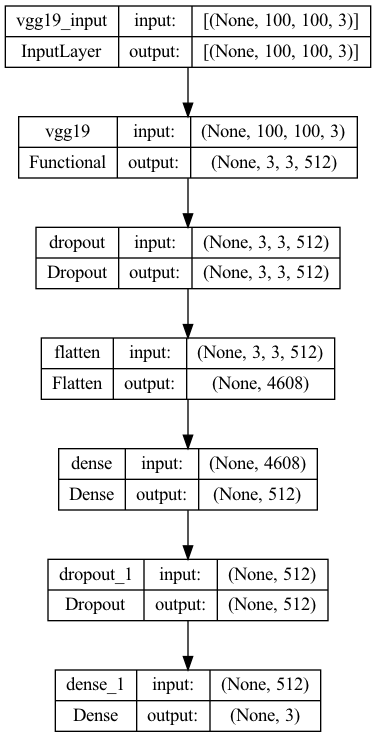

In [ ]:
keras.utils.plot_model(pmii, show_shapes=True)

##### Compile and Training Model

In [ ]:
pmii.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

pmii_history = pmii.fit(train_ds_cnn,
                        epochs=60,
                        validation_data=valid_ds,
                        callbacks=callback)

Epoch 1/60


2022-10-30 14:27:02.898358: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


600/600 [==============================] - ETA: 0s - loss: 1.5959 - accuracy: 0.3702

2022-10-30 14:29:56.220717: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


600/600 [==============================] - 196s 326ms/step - loss: 1.5959 - accuracy: 0.3702 - val_loss: 1.1078 - val_accuracy: 0.2882
Epoch 2/60
600/600 [==============================] - 197s 329ms/step - loss: 1.1072 - accuracy: 0.3865 - val_loss: 1.0959 - val_accuracy: 0.2798
Epoch 3/60
600/600 [==============================] - 196s 327ms/step - loss: 1.0955 - accuracy: 0.3996 - val_loss: 1.1031 - val_accuracy: 0.2724
Epoch 4/60
600/600 [==============================] - 200s 334ms/step - loss: 1.0934 - accuracy: 0.4059 - val_loss: 1.0822 - val_accuracy: 0.3499
Epoch 5/60
600/600 [==============================] - 198s 330ms/step - loss: 1.0906 - accuracy: 0.4108 - val_loss: 1.0721 - val_accuracy: 0.3807
Epoch 6/60
600/600 [==============================] - 202s 337ms/step - loss: 1.0912 - accuracy: 0.4120 - val_loss: 1.0871 - val_accuracy: 0.3067
Epoch 7/60
600/600 [==============================] - 202s 336ms/step - loss: 1.0879 - accuracy: 0.4141 - val_loss: 1.0972 - val_accura

##### Plot loss and Accuracy

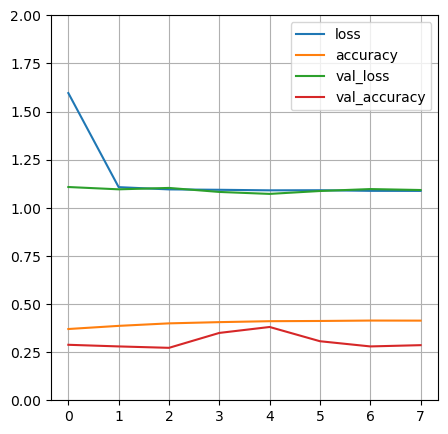

In [ ]:
pd.DataFrame(pmii_history.history).plot(figsize=(5, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2)
plt.show()

In this plot:

Since we are using the same architecture as a top layer over VGG layers, we are facing or seeing same graph as ResNet. We can improve it by creating a top layer similar to VGG network.

### EfficientNetB7

In [ ]:
import tensorflow as tf
from keras.models import Model
from keras.layers import Dense, Dropout
from keras.applications.efficientnet import EfficientNetB7

#### Model Explaination

EfficientNet is based on the baseline network developed by the neural architecture search using the AutoML MNAS framework. The network is fine-tuned for obtaining maximum accuracy but is also penalized if the network is very computationally heavy. It is also penalized for slow inference time when the network takes a lot of time to make predictions. The architecture uses a mobile inverted bottleneck convolution similar to MobileNet V2 but is much larger due to the increase in FLOPS. This baseline model is scaled up to obtain the family of EfficientNets.

EfficientNet-B7 the total layers are 814, all these layers can be made from 5 modules.
* Module 1 — This is used as a starting point for the sub-blocks.
* Module 2 — This is used as a starting point for the first sub-block of all the 7 main blocks except the 1st one.
* Module 3 — This is connected as a skip connection to all the sub-blocks.
* Module 4 — This is used for combining the skip connection in the first sub-blocks.
* Module 5 — Each sub-block is connected to its previous sub-block in a skip connection and they are combined using this module.

Each Module is then divided into sub-blocks, which are used in a different ways
* Sub-block 1 — This is used only used as the first sub-block in the first block.
* Sub-block 2 — This is used as the first sub-block in all the other blocks.
* Sub-block 3 — This is used for any sub-block except the first one in all the blocks.

#### Implementation

##### Build Model

In [ ]:
def create_ef7_base_model(train=None):
    base_model = EfficientNetB7(
        weights="imagenet",
        include_top=False,
        input_shape=[100, 100, 3])
    
    if train==None:
        base_model.trainable = False
    else:
        base_model.trainable = True
        for layer in base_model.layers[:train]:
            layer.trainable = False

    return base_model

#####  Visualize layers

In [ ]:
clear_session()
eff_model = create_ef7_base_model()

# Check the trainable status of the individual layers
for layer in eff_model.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x40fea4fd0> False
<keras.layers.preprocessing.image_preprocessing.Rescaling object at 0x547d89ca0> False
<keras.layers.preprocessing.normalization.Normalization object at 0x417480e80> False
<keras.layers.preprocessing.image_preprocessing.Rescaling object at 0x40febc550> False
<keras.layers.reshaping.zero_padding2d.ZeroPadding2D object at 0x547f7a9d0> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x40fe849d0> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x547de0370> False
<keras.layers.core.activation.Activation object at 0x417498850> False
<keras.layers.convolutional.depthwise_conv2d.DepthwiseConv2D object at 0x54130bbe0> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x54130bb80> False
<keras.layers.core.activation.Activation object at 0x541306790> False
<keras.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D object at 0x5413063d0> False
<

In [ ]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(eff_model.layers))

# Trainable variables
len(eff_model.trainable_variables)

Number of layers in the base model:  814


0

##### PMiii Model

In [ ]:
flatten_layer = Flatten()
dropout_layer_1 = Dropout(0.5)
dense_layer = Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.02))
dropout_layer_2 = Dropout(0.2)
prediction_layer = Dense(3, activation='softmax')


pmiii = tf.keras.models.Sequential([
    eff_model,
    dropout_layer_1,
    flatten_layer,
    dense_layer,
    dropout_layer_2,
    prediction_layer
])

pmiii.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb7 (Functional)  (None, 4, 4, 2560)       64097687  
                                                                 
 dropout_4 (Dropout)         (None, 4, 4, 2560)        0         
                                                                 
 flatten_2 (Flatten)         (None, 40960)             0         
                                                                 
 dense_4 (Dense)             (None, 512)               20972032  
                                                                 
 dropout_5 (Dropout)         (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 3)                 1539      
                                                                 
Total params: 85,071,258
Trainable params: 20,973,571


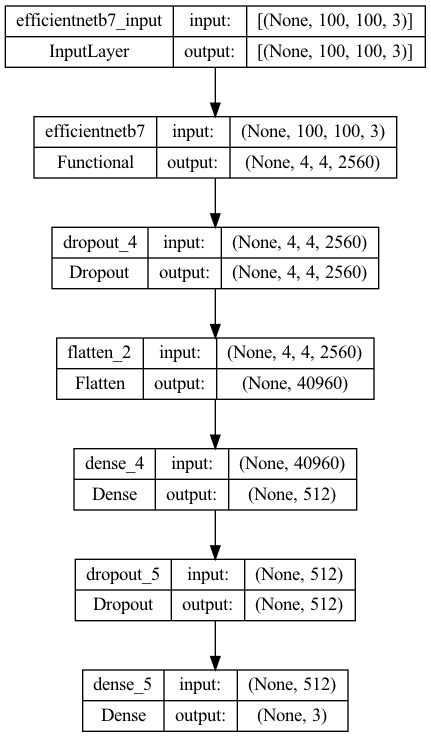

In [ ]:
keras.utils.plot_model(pmiii, show_shapes=True)

##### Compile and Training Model

In [ ]:
pmiii.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

pmiii_history = pmiii.fit(
    train_ds_cnn,
    epochs=60,
    validation_data=valid_ds,
    callbacks=callback)


Epoch 1/60


2022-10-30 15:31:38.555530: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


600/600 [==============================] - ETA: 0s - loss: 12.2993 - accuracy: 0.3312

2022-10-30 15:42:49.468994: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


600/600 [==============================] - 780s 1s/step - loss: 12.2993 - accuracy: 0.3312 - val_loss: 1.2882 - val_accuracy: 0.5699
Epoch 2/60
600/600 [==============================] - 704s 1s/step - loss: 1.1559 - accuracy: 0.3291 - val_loss: 1.1062 - val_accuracy: 0.5699
Epoch 3/60
600/600 [==============================] - 715s 1s/step - loss: 1.1017 - accuracy: 0.3303 - val_loss: 1.1021 - val_accuracy: 0.2262
Epoch 4/60
600/600 [==============================] - 766s 1s/step - loss: 1.0989 - accuracy: 0.3287 - val_loss: 1.0992 - val_accuracy: 0.2039
Epoch 5/60
600/600 [==============================] - 756s 1s/step - loss: 1.0987 - accuracy: 0.3266 - val_loss: 1.1001 - val_accuracy: 0.2039
Epoch 6/60
600/600 [==============================] - 735s 1s/step - loss: 1.0988 - accuracy: 0.3302 - val_loss: 1.0989 - val_accuracy: 0.2039
Epoch 7/60
600/600 [==============================] - 764s 1s/step - loss: 1.0987 - accuracy: 0.3372 - val_loss: 1.0939 - val_accuracy: 0.5699
Epoch 8/6

##### Plot loss and Accuracy

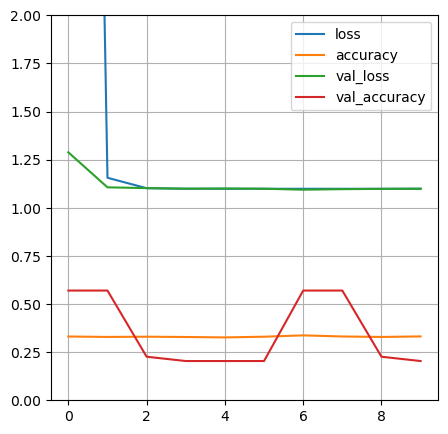

In [ ]:
pd.DataFrame(pmiii_history.history).plot(figsize=(5, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2)
plt.show()

### Evaluation on Pretained models

In [ ]:
pmi_loss, pmi_accuracy = pmi.evaluate(valid_ds)

print("Loss: ", pmi_loss)
print("Accuracy: ", pmi_accuracy)

pmii_loss, pmii_accuracy = pmii.evaluate(valid_ds)

print("Loss: ", pmii_loss)
print("Accuracy: ", pmii_accuracy)

pmiii_loss, pmiii_accuracy = pmiii.evaluate(valid_ds)

print("Loss: ", pmiii_loss)
print("Accuracy: ", pmiii_accuracy)

2022-10-30 19:47:47.993153: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


82/82 [==============================] - 61s 595ms/step - loss: 1.0032 - accuracy: 0.4204
Loss:  1.003196358680725
Accuracy:  0.4204238951206207


2022-10-30 19:48:48.500111: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


82/82 [==============================] - 30s 353ms/step - loss: 1.0706 - accuracy: 0.4004
Loss:  1.070642352104187
Accuracy:  0.3892100155353546


2022-10-30 19:49:18.562003: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


82/82 [==============================] - 100s 1s/step - loss: 1.0959 - accuracy: 0.5699
Loss:  1.0958642959594727
Accuracy:  0.5699421763420105


Model|loss|Accuracy
---|---|---|
PMi|1.00|42%
PMii|1.07|38%
PMiii|1.09|56%

PMi being the ResNet Model with 42% accuracy, PMii is a VGG model with 38% and PMiii EfficientNet model with 56% Accuracy. For each model all the layers were freezed.

PMi(ResNet) and PMii(VGG) both the models shows overfiiting as the model accuracy on training dataset is much higher then the validation data. And there in no change in loss rate making signifies that the model is not learning. Whereas PMiii(EfficientNet) model has a higher accuracy then others but still not a good fit since the accuracy on the validation set flucting making model not goof fit for test data.

#### Unfreezing 14 layers of EfficentNetB7

In [ ]:
clear_session()
eff_model2 = create_ef7_base_model(700)

# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(eff_model2.layers))

len(eff_model2.trainable_variables)

Number of layers in the base model:  814


101

##### Layers

In [ ]:
# Check the trainable status of the individual layers
for layer in eff_model2.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x1546e56a0> False
<keras.layers.preprocessing.image_preprocessing.Rescaling object at 0x15646b730> False
<keras.layers.preprocessing.normalization.Normalization object at 0x15646ba60> False
<keras.layers.preprocessing.image_preprocessing.Rescaling object at 0x154669df0> False
<keras.layers.reshaping.zero_padding2d.ZeroPadding2D object at 0x1564f4220> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x1565338e0> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x156533af0> False
<keras.layers.core.activation.Activation object at 0x1565940d0> False
<keras.layers.convolutional.depthwise_conv2d.DepthwiseConv2D object at 0x15810e910> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x15812b910> False
<keras.layers.core.activation.Activation object at 0x15815d8b0> False
<keras.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D object at 0x15815daf0> False
<

##### Model

In [ ]:
from tensorflow.keras.layers import BatchNormalization, GlobalAveragePooling2D, Conv2D


dropout_layer_1 = Dropout(0.2)
convo_layer_1 = Conv2D(32, 2, kernel_regularizer=regularizers.l2(0.02))
convo_layer_2 = Conv2D(64, 2, kernel_regularizer=regularizers.l2(0.02))
normalization_layer = BatchNormalization()
pooling_layers = GlobalAveragePooling2D()
dropout_layer_2 = Dropout(0.2)
flatten_layer = Flatten()
dense_layer = Dense(512, activation='relu')
prediction_layer = Dense(3, activation='softmax')

pmiii_1 = tf.keras.models.Sequential([
    eff_model2,
    dropout_layer_1,
    convo_layer_1,
    convo_layer_2,
    normalization_layer,
    dropout_layer_2,
    flatten_layer,
    dense_layer,
    prediction_layer
])

pmiii_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb7 (Functional)  (None, 4, 4, 2560)       64097687  
                                                                 
 dropout_2 (Dropout)         (None, 4, 4, 2560)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 32)          327712    
                                                                 
 conv2d_3 (Conv2D)           (None, 2, 2, 64)          8256      
                                                                 
 batch_normalization_1 (Batc  (None, 2, 2, 64)         256       
 hNormalization)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 2, 2, 64)          0         
                                                        

##### Compile and train

In [ ]:
pmiii_1.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

pmiii1_history = pmiii_1.fit(
    train_ds_cnn,
    epochs=60,
    validation_data=valid_ds,
    callbacks=callback)

Epoch 1/60


2022-10-31 22:13:13.894465: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


600/600 [==============================] - ETA: 0s - loss: 1.4354 - accuracy: 0.3328

2022-10-31 22:22:57.934921: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


600/600 [==============================] - 661s 1s/step - loss: 1.4354 - accuracy: 0.3328 - val_loss: 1.1114 - val_accuracy: 0.5699
Epoch 2/60
600/600 [==============================] - 625s 1s/step - loss: 1.1312 - accuracy: 0.3367 - val_loss: 1.1062 - val_accuracy: 0.5699
Epoch 3/60
600/600 [==============================] - 632s 1s/step - loss: 1.1229 - accuracy: 0.3338 - val_loss: 1.0929 - val_accuracy: 0.5699
Epoch 4/60
600/600 [==============================] - 623s 1s/step - loss: 1.1414 - accuracy: 0.3322 - val_loss: 1.1145 - val_accuracy: 0.2262
Epoch 5/60
600/600 [==============================] - 609s 1s/step - loss: 1.1244 - accuracy: 0.3340 - val_loss: 1.1125 - val_accuracy: 0.2039
Epoch 6/60
600/600 [==============================] - 635s 1s/step - loss: 1.1099 - accuracy: 0.3332 - val_loss: 1.1050 - val_accuracy: 0.2039
Epoch 6: early stopping


##### Plot loss and Accuracy

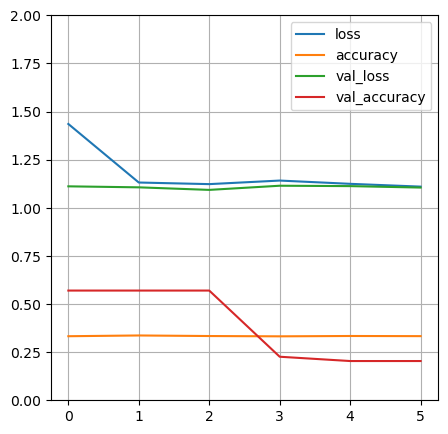

In [ ]:
pd.DataFrame(pmiii1_history.history).plot(figsize=(5, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2)
plt.show()

In this plot we do observe a change in Accuracy for validation set but observing the training set accuracy, model is not learning.

In [ ]:
pmiii1_loss, pmiii1_accuracy = pmiii_1.evaluate(valid_ds)

print("Loss: ", pmiii1_loss)
print("Accuracy: ", pmiii1_accuracy)

82/82 [==============================] - 48s 582ms/step - loss: 1.0929 - accuracy: 0.5699
Loss:  1.0929104089736938
Accuracy:  0.5699421763420105


## Details on Deep Learning Model

In Deep learning Models, I 1st tried to build a Deep Neural Network model with 3 dense hidden layers and 1 output layer. Since we know that the we have a image dataset I specifically used **Adam Optimizer** which has good result on Multi-label Classification as we have 3 labels which needs to be predicted.

Also have used *Relu* activation function beacause it does not activate all the neurons at the same time, meaning the neurons will only be deactivated if the output of the linear transformation is less than 0. For the negative input values, the result is zero, that means the neuron does not get activated. Since only a certain number of neurons are activated, the ReLU function is far more computationally efficient when compared to the sigmoid and tanh function(Since facing a computational issue, when implementing models). Drawback of using **Rele Actvation** function is that we face a neurons dying problem. So we tested by changing Activation fucntion to "Sigmoid" and "Leaky Relu".

When creating DNN models, I 1st created a simple basic DNN network and estimated the accuracy and loss on validation set, observing the accuracy we are facing **neurons dying issue** which signifies that we might need to change our activation function. I did continue by creating 3 other varinats of DNN models in which my aim was to obtain best working model with Oversampling, Data Augmentation, Regularization and Learning Rate by looking at the accuracy and loss of each model.

After implementing and analysing DNN model, I got an idea that model with regularizer and Dropout layer will give an optimal model. Keeping that in mind I created Convolutional layers, Similar to DNN , a simple CNN model was created, assuming that out model is not learning important features, created a 2nd CNN variant with dropout layers. Whereas with every CNN model we observe that model is not learning at all (training accuracy is not chaning). That signifies that the CNN model we might need to change the activation.

Lastly I tried with Pre-trianed models like VGG , Resnet and EfficientNet faced similar issue with training accruacy as it was not improving, I tried to change the activtion function. There also might be the issue that my custom layer is not compatiable with the archiecture of the pre-trained model. Picked effcientNetb7 as one model and try to create a layer and trained the model to get the accuracy.

# Discussion of Model Performance and Implementation

Comparing my final conventional ML and deep learning models, the conventional ML has performed signigficantly better than deep learning one (performed better by 5%) on the public test set. The Conventional learning model ranked #11 out of 30 submissions on the public test set, with the top-performing system having 78.9% accuracy, and a majority class baseline having 55% accuracy.

All the models trained 

Model|loss|Accuracy
---|---|---|
SVC|---|63%
DNNi|0.97|51%
DNNii|1.07|38%
DNNiii|1.09|56%
DNNiv|1.09|56%
CNNi|1.09|56%
CNNii|1.12|56%
CNNiii|1.09|56%
CNNiv|1.09|22%
PMi|1.00|42%
PMii|1.07|38%
PMiii|1.09|56%

The model preformance on validation set can be seen as a fluctuating. This tells us that the Activation function used for during the trainig is not correct. And we have a nerouns dying issue when training model on training set, which ends up as model not learning any important feature Since I'm only using few layers to train create the model. Model is not able to learn any features of the image.

Models giving 78% accuracy in kaggle might be using esemble learning to train the image dataset. It is a technique that combines several base models in order to produce one optimal predictive model. Within esemble learning we can use Bagging approach ,which is to minimize the variance. In it we  randomly create samples of training datasets with subsets of the training data. The subsets are then used for training models. Consequently, there is a combination of multiple models, which reduces variance, as the average prediction generated from different models is much more reliable and robust than a single model or a decision tree.

### Dicussion on DNN Models 

When training Model with Dense neural network it is not performing good, which means either we 

1. are creating less dense NN or 
2. we need to preprocess the data, which means data is not pure enough to train or 
3. need to use different Neural Network model.

We also can signify that

1. model has a good loss rate with regularizers
2. Data Augumentation and oversampling of data is not too much overfitting the model( thus we can use it)
3. There might be some features in the dataset which needs to be dropped.

Let's go through each of the points and try to incerease our model accuracy.

### Disscussion on CNN Models

When training image data with Convolutional neural network, we are still not obtaining a good fit model as:
1. The model layers are not deep enough to extract feature to train,
2. Optimizer ad Activation functions are not appropriate,

Since we implemented the model observing the Deep neural network with regulariziers and dropout and plotting the loss and accuracy of each CNN model 
1. Pooling layers are not much effective as it may be the scenario that our model is not extracting features and pooling is not done appropriatly, for pooling layer to be more effective it is essential that the image or the model is dense to pool features.
2. Adding Normalization layer is not useful either because the model shows the it is not learning maintaining the same loss rate and underfiiting since the validation auccracy is much lower and constant.

Let's try to build and train our data with pre-trained models.


### Disscussion on Pretrained Models

When training with pretrain-models like VGG , ResNet and EfficientNet we face the similiar issue of model not learning with the given data. The problems would be that top layers are not correctly implemented with the model. As pre-trained model has already been trained with certain layer like pooling, normalization, padding etc. So understand and creating a model according to pre-trained model could increase the accuracy of the model.

We can observe that models when freezing layers are not learning. So I tried with unfreezing of layers. After training model with unfreezing of layers, model seems not to be learining as training accuracy of the model is constant.

# Model testing with private dataset

## Pre-processing Dataset

In [ ]:
image_size = 100

private_images = np.load(join(dataset_directory, 'test_priv_images.npy')) # private_test
test_priv_images = private_images.reshape([-1, image_size, image_size, 3]) / 255.0

print(test_priv_images.shape)

(2122, 100, 100, 3)


In [ ]:
# Convert to Grayscale
data_gray_private_test = [ color.rgb2gray(i) for i in test_priv_images]
len(data_gray_private_test)

2122

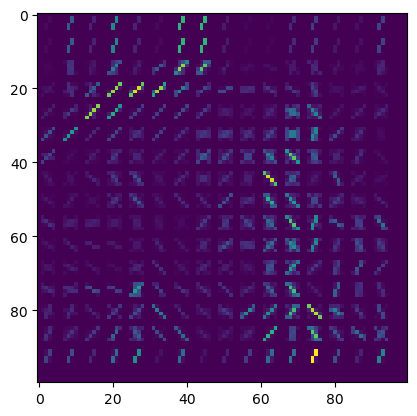

In [ ]:
ppc = 6
hog_images = []
hog_features_test = []

for image in data_gray_private_test:
    fd,hog_image = hog(image, orientations=8,
                       pixels_per_cell=(ppc,ppc),
                       cells_per_block=(4, 4),
                       block_norm= 'L2-Hys',
                       visualize=True )
    hog_images.append(hog_image)
    hog_features_test.append(fd)

plt.imshow(hog_images[0])

In [ ]:
# Shape of the validation dataset
hog_features_test = np.array(hog_features_test)
hog_features_test.shape

(2122, 21632)

## Predicting

In [ ]:
# model definition code
clf_svc_test = SVC(random_state=0)

clf_svc_test.fit(hog_features_gray, y_train)

In [ ]:
y_pred_test = clf_svc.predict(hog_features_test)

y_pred_test

array([2, 2, 1, ..., 1, 0, 1])

## Evaluating

In [ ]:
# calculating accuracy score on test set
accuracy_svc = accuracy_score(y_valid, y_pred_test)
print("Acc on validation set: ", accuracy_svc*100)

## Saving

In [ ]:
id = list(range(len(y_pred_test)))
predicted_private_data = {"Id": id, "Prediction": y_pred_test}

savetestfile = join(dataset_directory,'46312625-conv-SVC_HOG_l2hys_private.csv')

baseline_majority = pd.DataFrame(data=predicted_private_data)
baseline_majority.to_csv(savetestfile, index=False)